### House price prediction

##### Importing libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.utils import check_array
from imblearn.over_sampling import SMOTE
import math
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,precision_score, recall_score, roc_curve
#from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
#from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

##### Reading train and test csv files

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
df_train = train.copy()
df_test = test.copy()

In [0]:
train.shape

(1460, 81)

In [0]:
test.shape

(1459, 80)

##### Concatenating train and test for data preprocessing and data munging

##### Analysing data

In [0]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [0]:
df_train.shape

(1460, 81)

In [0]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [0]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [0]:
df_train.isnull().sum().sort_values(ascending  =False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
                 ... 
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
3SsnPorch           0
BsmtUnfSF           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
Functional          0
TotRmsAbvGrd        0
KitchenQua

##### plotting missing values in sorting order

In [0]:
def missingvalues(df_train):
    missing_values = df_train.isnull().sum()
    missing_values =missing_values[(missing_values > 0) & (missing_values.index !='SalePrice')]
    missing_values.sort_values(inplace = True,ascending =False)
    return missing_values

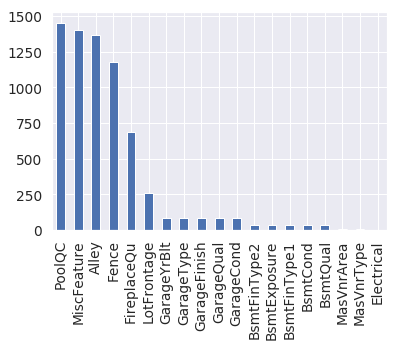

In [0]:
#missing_values = df_train.isnull().sum()
#missing_values =missing_values[missing_values > 0]
#missing_values.sort_values(inplace = True)

missing_values=missingvalues(df_train)
missing_values.plot.bar()

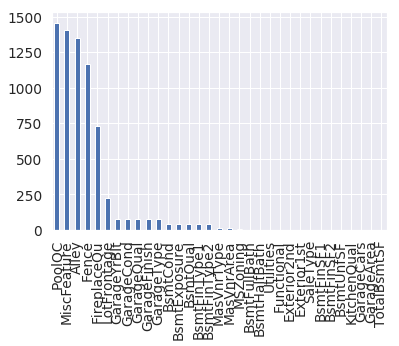

In [0]:
missing_values=missingvalues(df_test)
missing_values.plot.bar()

In [0]:
#missing_value =df_train.isnull().sum()
#missing_value[missing_value>0].sort_values(ascending = False)
missing_values =missingvalues(df_train)
missing_values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

##### 34 columns having missing values

##### handling missing values

##### Deleting missing values more than 15% of the total rows

In [0]:
missing_values =((df_train.isnull().sum()/len(df_train))*100)
missing_values =missing_values[(missing_values >15) & (missing_values.index !='SalePrice')]
d1=pd.DataFrame(missing_values)
d1.reset_index(False,inplace =True)
d1.columns =['missing_Cols','%']
df_train.drop(d1.missing_Cols,inplace=True,axis =1)


In [0]:
missing_values =((df_test.isnull().sum()/len(df_test))*100)
missing_values =missing_values[(missing_values >15)]
d1=pd.DataFrame(missing_values)
d1.reset_index(False,inplace =True)
d1.columns =['missing_Cols','%']
df_test.drop(d1.missing_Cols,inplace=True,axis =1)

In [0]:

#missing_value_test =df_test.isnull().sum()
#missing_value_test = missing_value_test[missing_value_test>0].sort_values(ascending = False)
#missing_value_test
missing_value =missingvalues(df_train)
missing_value

GarageCond      81
GarageQual      81
GarageFinish    81
GarageYrBlt     81
GarageType      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [0]:
missing_value =missingvalues(df_test)
missing_value

GarageQual      78
GarageFinish    78
GarageYrBlt     78
GarageCond      78
GarageType      76
BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
Utilities        2
Exterior1st      1
Exterior2nd      1
SaleType         1
BsmtFinSF1       1
BsmtFinSF2       1
TotalBsmtSF      1
KitchenQual      1
GarageCars       1
GarageArea       1
BsmtUnfSF        1
dtype: int64

##### after deleting 15% data 24 columns are still having missing values

In [0]:
df_train.shape

(1460, 75)

In [0]:
df_test.shape

(1459, 74)

In [0]:
numerical =[f for f in df_train.columns if df_train.dtypes[f] != 'object']
categorical = [f for f in df_train.columns if df_train.dtypes[f] == 'object']
#numerical_features =df_train.select_dtypes(include=[np.number])
#categorical_features =df_train.select_dtypes(exclude=[np.number])

In [0]:
numericaltest =[f for f in df_test.columns if df_test.dtypes[f] != 'object']
categoricaltest = [f for f in df_test.columns if df_test.dtypes[f] == 'object']

In [0]:
numerical.remove('Id')#,'SalePrice'],inplace =True,axis =1)
numerical.remove('SalePrice')

In [0]:
numericaltest.remove('Id')

In [0]:
def maxzerocols(col):
    #print(col,": ",df_train[(df_train[col] ==0 )|(df_train[col] ==1)].shape[0])
    maxzerocols =df_train[(df_train[col] ==0 )|(df_train[col] ==1)].shape[0]
    
    maxzerocols = round(maxzerocols/len(df_train)*100)
    if(maxzerocols>85):
       
        print(col,": ",maxzerocols)
        df_train.drop(col,axis=1,inplace=True)
    
#cols =['BsmtFinSF2', 'LowQualFinSF','BsmtHalfBath','EnclosedPorch','3SsnPorch', 
#       'ScreenPorch', 'PoolArea','MiscVal','KitchenAbvGr']
for col in numerical:
    maxzerocols(col)

BsmtFinSF2 :  89
LowQualFinSF :  98
BsmtFullBath :  99
BsmtHalfBath :  100
HalfBath :  99
KitchenAbvGr :  95
Fireplaces :  92
EnclosedPorch :  86
3SsnPorch :  98
ScreenPorch :  92
PoolArea :  100
MiscVal :  96


In [0]:
def maxzerocols(col):
    #print(col,": ",df_train[(df_train[col] ==0 )|(df_train[col] ==1)].shape[0])
    maxzerocols =df_test[(df_test[col] ==0 )|(df_test[col] ==1)].shape[0]
    maxzerocols = round(maxzerocols/len(df_train)*100)
    if(maxzerocols>85):
        #print(maxzerocols)
        print(col,": ",maxzerocols)
        df_test.drop(col,axis=1,inplace=True)
    
#cols =['BsmtFinSF2', 'LowQualFinSF','BsmtHalfBath','EnclosedPorch','3SsnPorch', 
#       'ScreenPorch', 'PoolArea','MiscVal','KitchenAbvGr']
for col in numericaltest:
    maxzerocols(col)

BsmtFinSF2 :  88
LowQualFinSF :  99
BsmtFullBath :  98
BsmtHalfBath :  100
HalfBath :  99
KitchenAbvGr :  96
Fireplaces :  92
3SsnPorch :  99
ScreenPorch :  90
PoolArea :  100
MiscVal :  96


In [0]:
#print("column: ",df_train[(df_train['EnclosedPorch'] ==0 )|(df_train['EnclosedPorch'] ==1)].shape[0])
#df_train.drop(['EnclosedPorch'],axis=1,inplace=True)

In [0]:
print("column: ",df_test[(df_test['EnclosedPorch'] ==0 )|(df_test['EnclosedPorch'] ==1)].shape[0])
df_test.drop(['EnclosedPorch'],axis=1,inplace=True)

column:  1208


In [0]:
df_train.shape

(1460, 63)

In [0]:
df_test.shape

(1459, 62)

In [0]:
for col in categorical:
  print("MostFreqValue in_",col,": ",df_train[col].value_counts().idxmax())

MostFreqValue in_ MSZoning :  RL
MostFreqValue in_ Street :  Pave
MostFreqValue in_ LotShape :  Reg
MostFreqValue in_ LandContour :  Lvl
MostFreqValue in_ Utilities :  AllPub
MostFreqValue in_ LotConfig :  Inside
MostFreqValue in_ LandSlope :  Gtl
MostFreqValue in_ Neighborhood :  NAmes
MostFreqValue in_ Condition1 :  Norm
MostFreqValue in_ Condition2 :  Norm
MostFreqValue in_ BldgType :  1Fam
MostFreqValue in_ HouseStyle :  1Story
MostFreqValue in_ RoofStyle :  Gable
MostFreqValue in_ RoofMatl :  CompShg
MostFreqValue in_ Exterior1st :  VinylSd
MostFreqValue in_ Exterior2nd :  VinylSd
MostFreqValue in_ MasVnrType :  None
MostFreqValue in_ ExterQual :  TA
MostFreqValue in_ ExterCond :  TA
MostFreqValue in_ Foundation :  PConc
MostFreqValue in_ BsmtQual :  TA
MostFreqValue in_ BsmtCond :  TA
MostFreqValue in_ BsmtExposure :  No
MostFreqValue in_ BsmtFinType1 :  Unf
MostFreqValue in_ BsmtFinType2 :  Unf
MostFreqValue in_ Heating :  GasA
MostFreqValue in_ HeatingQC :  Ex
MostFreqValue in_

In [0]:
for col in categorical:
  print("MostFreqValue in_",col,": ",df_test[col].value_counts().idxmax())

MostFreqValue in_ MSZoning :  RL
MostFreqValue in_ Street :  Pave
MostFreqValue in_ LotShape :  Reg
MostFreqValue in_ LandContour :  Lvl
MostFreqValue in_ Utilities :  AllPub
MostFreqValue in_ LotConfig :  Inside
MostFreqValue in_ LandSlope :  Gtl
MostFreqValue in_ Neighborhood :  NAmes
MostFreqValue in_ Condition1 :  Norm
MostFreqValue in_ Condition2 :  Norm
MostFreqValue in_ BldgType :  1Fam
MostFreqValue in_ HouseStyle :  1Story
MostFreqValue in_ RoofStyle :  Gable
MostFreqValue in_ RoofMatl :  CompShg
MostFreqValue in_ Exterior1st :  VinylSd
MostFreqValue in_ Exterior2nd :  VinylSd
MostFreqValue in_ MasVnrType :  None
MostFreqValue in_ ExterQual :  TA
MostFreqValue in_ ExterCond :  TA
MostFreqValue in_ Foundation :  PConc
MostFreqValue in_ BsmtQual :  TA
MostFreqValue in_ BsmtCond :  TA
MostFreqValue in_ BsmtExposure :  No
MostFreqValue in_ BsmtFinType1 :  GLQ
MostFreqValue in_ BsmtFinType2 :  Unf
MostFreqValue in_ Heating :  GasA
MostFreqValue in_ HeatingQC :  Ex
MostFreqValue in_

column:  RL


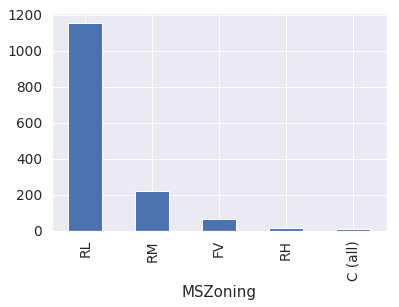

column:  Pave


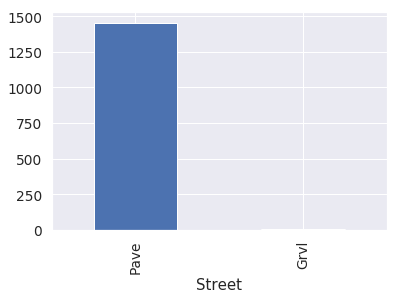

column:  Reg


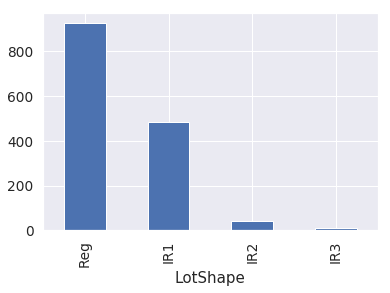

column:  Lvl


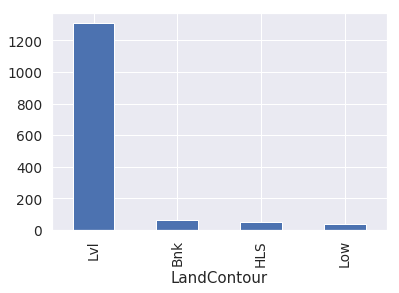

column:  AllPub


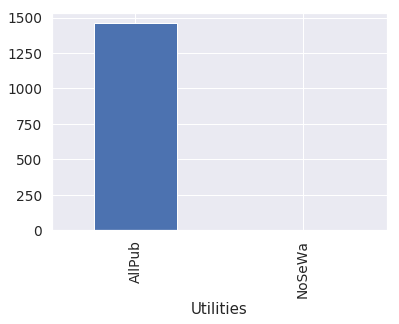

column:  Inside


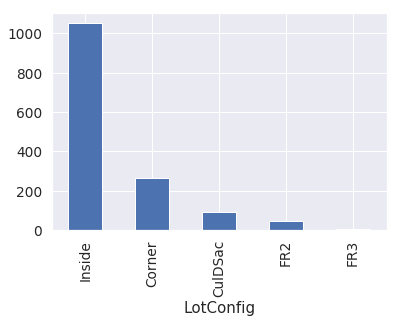

column:  Gtl


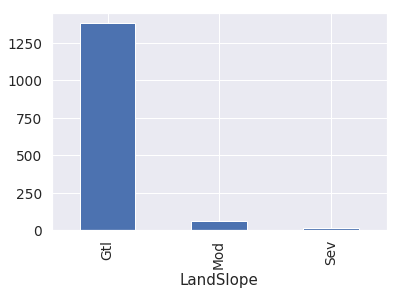

column:  NAmes


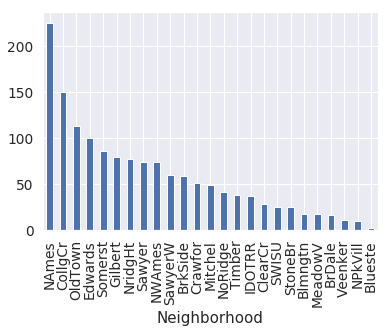

column:  Norm


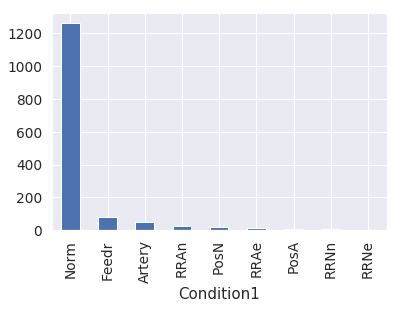

column:  Norm


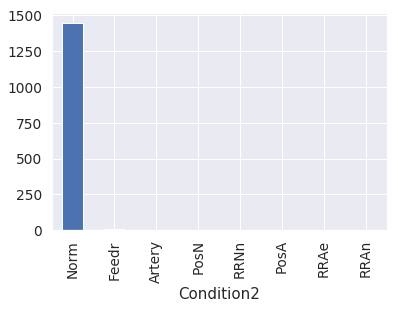

column:  1Fam


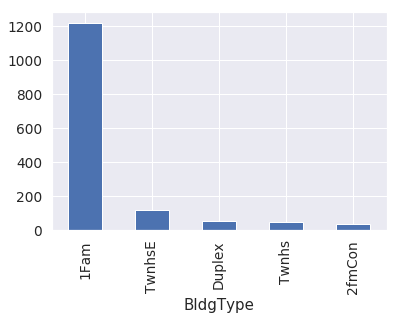

column:  1Story


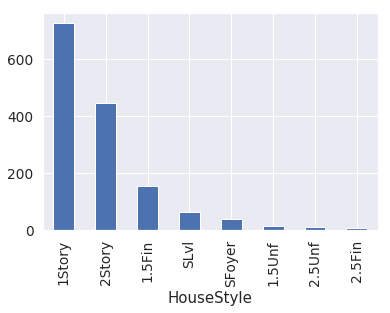

column:  Gable


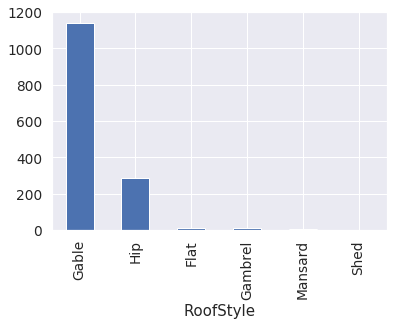

column:  CompShg


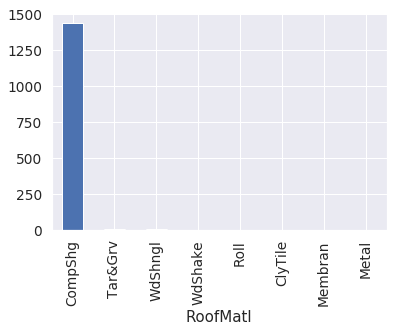

column:  VinylSd


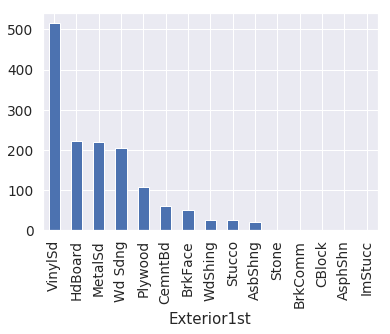

column:  VinylSd


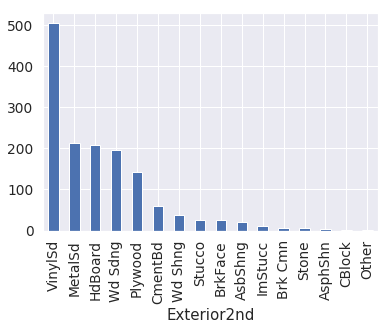

column:  None


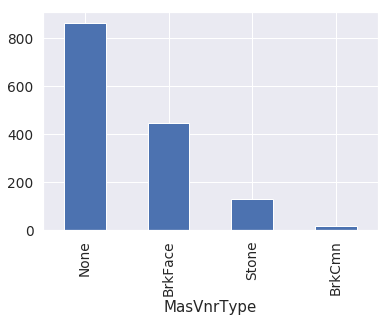

column:  TA


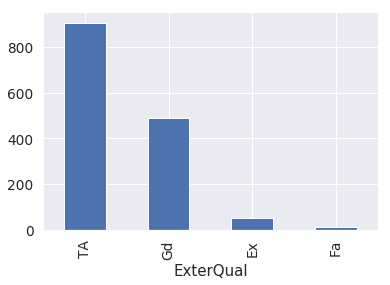

column:  TA


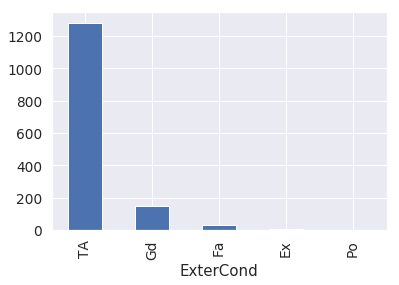

column:  PConc


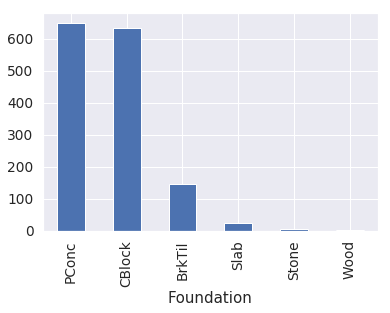

column:  TA


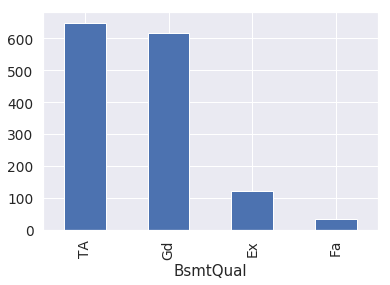

column:  TA


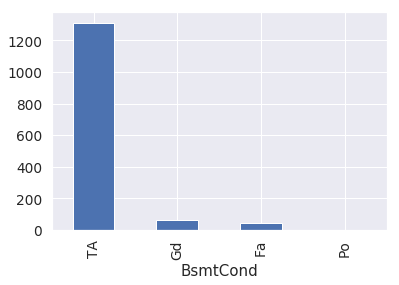

column:  No


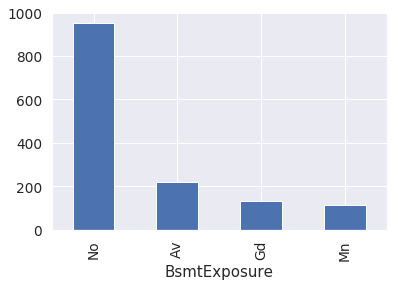

column:  Unf


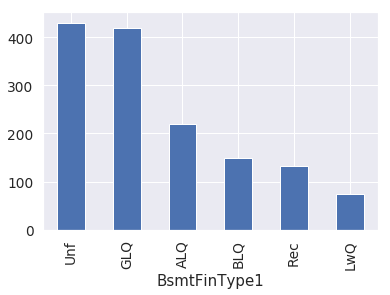

column:  Unf


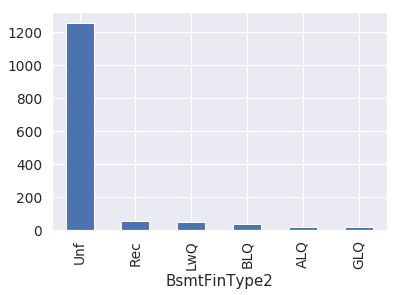

column:  GasA


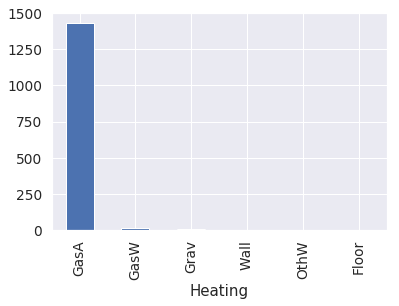

column:  Ex


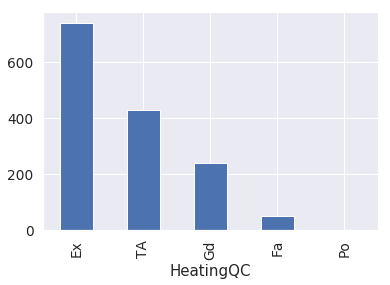

column:  Y


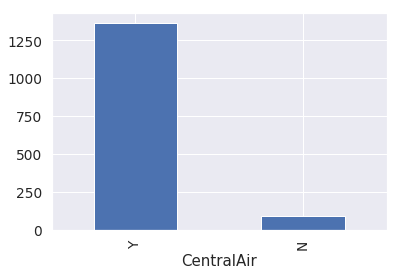

column:  SBrkr


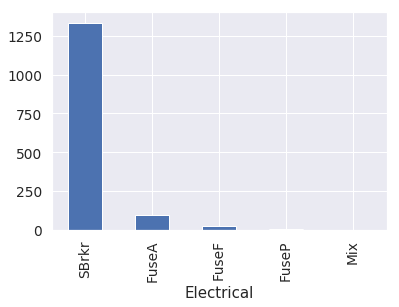

column:  TA


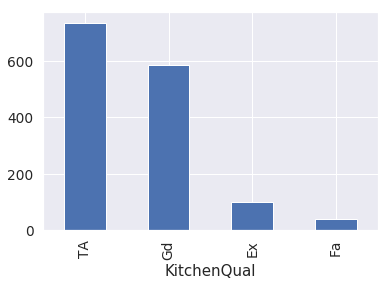

column:  Typ


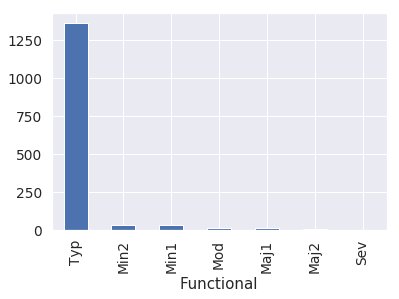

column:  Attchd


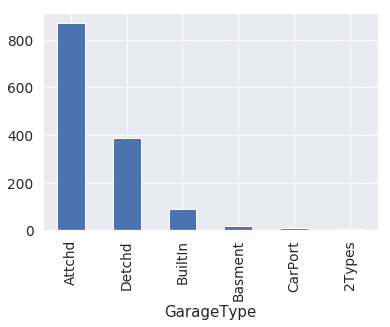

column:  Unf


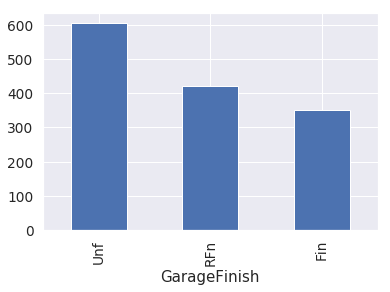

column:  TA


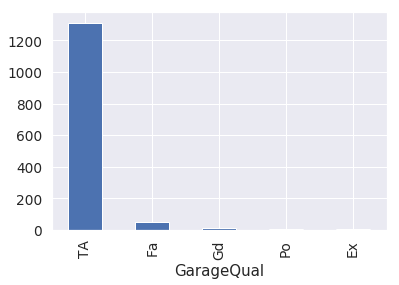

column:  TA


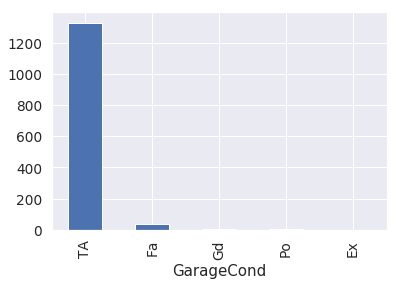

column:  Y


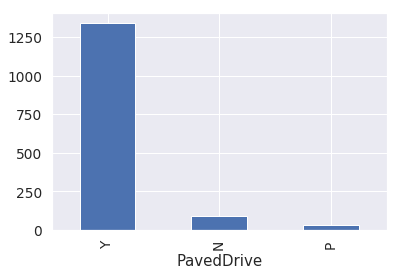

column:  WD


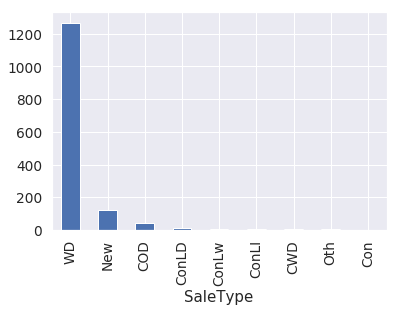

column:  Normal


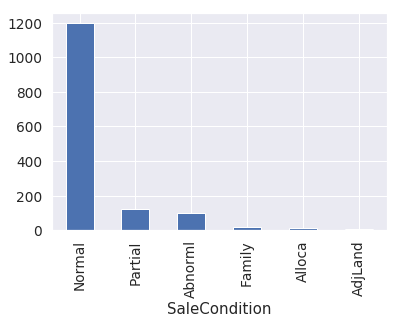

In [0]:
def valuecountsplot(col):
  df_train[col].value_counts().plot(kind='bar')
  print("column: ",df_train[col].value_counts().idxmax())
  plt.xlabel(col)
  plt.show()
   

for col in categorical:
  valuecountsplot(col)
  

###### One missing value in Saletype  is imputed with most frequncy value(WD) 'Warranty Deed - Conventional'

In [0]:
df_train.SaleType =df_train.SaleType.fillna(df_train.SaleType.value_counts().idxmax())

In [0]:
df_test.SaleType =df_test.SaleType.fillna(df_test.SaleType.value_counts().idxmax())

###### One missing value in KitchenQual  is imputed with most frequncy value(TA) 'Typical/Average'

In [0]:
df_train.KitchenQual =df_train.KitchenQual.fillna(df_train.KitchenQual.value_counts().idxmax())

In [0]:
df_test.KitchenQual =df_test.KitchenQual.fillna(df_test.KitchenQual.value_counts().idxmax())

##### Categorical columns related to 'Garage' are imputed by 'No Garage', numerical columns are imputed by 0

In [0]:
df_train.GarageCond =df_train.GarageCond.fillna('No Garage')
df_train.GarageQual =df_train.GarageQual.fillna('No Garage')
df_train.GarageFinish =df_train.GarageFinish.fillna('No Garage')
df_train.GarageType =df_train.GarageType.fillna('No Garage')

In [0]:

df_test.GarageCond =df_test.GarageCond.fillna('No Garage')
df_test.GarageQual =df_test.GarageQual.fillna('No Garage')
df_test.GarageFinish =df_test.GarageFinish.fillna('No Garage')
df_test.GarageType =df_test.GarageType.fillna('No Garage')

###### Checking the records having GarageYrBlt is null, means no Garage in that particular house

In [0]:
df_train[df_train.GarageYrBlt.isnull()][['GarageCars','GarageArea','GarageType','GarageQual','GarageFinish','GarageYrBlt',
                                       'GarageCond'      ]]

,GarageCars,GarageArea,GarageType,GarageQual,GarageFinish,GarageYrBlt,GarageCond
39,0,0,No Garage,No Garage,No Garage,NaN,No Garage
48,0,0,No Garage,No Garage,No Garage,NaN,No Garage
78,0,0,No Garage,No Garage,No Garage,NaN,No Garage
88,0,0,No Garage,No Garage,No Garage,NaN,No Garage
89,0,0,No Garage,No Garage,No Garage,NaN,No Garage
99,0,0,No Garage,No Garage,No Garage,NaN,No Garage
108,0,0,No Garage,No Garage,No Garage,NaN,No Garage
125,0,0,No Garage,No Garage,No Garage,NaN,No Garage
127,0,0,No Garage,No Garage,No Garage,NaN,No Garage
140,0,0,No Garage,No Garage,No Garage,NaN,No Garage


In [0]:
df_train.GarageArea =df_train.GarageArea.fillna(0)
df_train.GarageCars =df_train.GarageCars.fillna(0)
df_train.GarageYrBlt =df_train.GarageYrBlt.fillna(0.0)

In [0]:
df_test.GarageArea =df_test.GarageArea.fillna(0)
df_test.GarageCars =df_test.GarageCars.fillna(0)
df_test.GarageYrBlt =df_test.GarageYrBlt.fillna(0.0)

##### Basement related categorical colums are imputed by 'No Basement' and numerical columns are imputed by 0

In [0]:
df_train.BsmtFinType2 =df_train.BsmtFinType2.fillna('No Basement')
df_train.BsmtExposure =df_train.BsmtExposure.fillna('No Basement')
df_train.BsmtExposure =df_train.BsmtExposure.replace('No','No Exposure')
df_train.BsmtFinType1 =df_train.BsmtFinType1.fillna('No Basement')
df_train.BsmtCond =df_train.BsmtCond.fillna('No Basement')
df_train.BsmtQual =df_train.BsmtQual.fillna('No Basement')

In [0]:
df_test.BsmtFinType2 =df_test.BsmtFinType2.fillna('No Basement')
df_test.BsmtExposure =df_test.BsmtExposure.fillna('No Basement')
df_test.BsmtExposure =df_test.BsmtExposure.replace('No','No Exposure')
df_test.BsmtFinType1 =df_test.BsmtFinType1.fillna('No Basement')
df_test.BsmtCond =df_test.BsmtCond.fillna('No Basement')
df_test.BsmtQual =df_test.BsmtQual.fillna('No Basement')

###### Checking the records when totalBSmtSF(total basement square feet) is null, no basement in that particular house

In [0]:
df_train[df_train.TotalBsmtSF.isnull()==True][['TotalBsmtSF','BsmtFinType2','BsmtExposure','BsmtFinType1',
                                               'BsmtCond','BsmtQual']]     

,TotalBsmtSF,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual


In [0]:
df_train.TotalBsmtSF =df_train.TotalBsmtSF.fillna(0.0)

In [0]:
df_test.TotalBsmtSF =df_test.TotalBsmtSF.fillna(0.0)

In [0]:
# Basement finished SquareFeet1 is null, if no basement in that particular house

In [0]:
df_train[df_train.BsmtFinSF1.isnull() == True]['BsmtFinType1'] 

Series([], Name: BsmtFinType1, dtype: object)

In [0]:
df_train.BsmtFinSF1 =df_train.BsmtFinSF1.fillna(0.0)

In [0]:
df_test.BsmtFinSF1 =df_test.BsmtFinSF1.fillna(0.0)

In [0]:
df_train.BsmtUnfSF =df_train.BsmtUnfSF.fillna(0.0)

In [0]:
df_test.BsmtUnfSF =df_test.BsmtUnfSF.fillna(0.0)

##### Masanery type is imputed by maxium frequency value

In [0]:
df_train.MasVnrType =df_train.MasVnrType.fillna('None')

In [0]:
df_test.MasVnrType =df_test.MasVnrType.fillna('None')

In [0]:
df_train[df_train.MasVnrArea.isnull() == True]['MasVnrType'] 

234     None
529     None
650     None
936     None
973     None
977     None
1243    None
1278    None
Name: MasVnrType, dtype: object

In [0]:
df_train.MasVnrArea.describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [0]:
df_train.MasVnrArea =df_train.MasVnrArea.fillna(0.0)       

In [0]:
df_test.MasVnrArea =df_test.MasVnrArea.fillna(0.0)       

In [0]:
df_train.MasVnrType =df_train.MasVnrType.fillna('None')

##### MsZoning, Utilites, Functional are imputed by most frequency value 

In [0]:
df_train.MSZoning= df_train.MSZoning.fillna(df_train.MSZoning.value_counts().idxmax())

In [0]:
df_test.MSZoning= df_test.MSZoning.fillna(df_test.MSZoning.value_counts().idxmax())

In [0]:
df_train.Utilities =df_train.Utilities.fillna(df_train.Utilities.value_counts().idxmax())

In [0]:
df_test.Utilities =df_test.Utilities.fillna(df_test.Utilities.value_counts().idxmax())

In [0]:
df_train.Functional =df_train.Functional.fillna(df_train.Functional.value_counts().idxmax())

In [0]:
df_test.Functional =df_test.Functional.fillna(df_test.Functional.value_counts().idxmax())

 
##### Records are dropped which has null value for Electrical,Exterior1st Extertior2nd. As there is no
##### much difference between each categorical type,imputing is not an good idea

In [0]:
df_train.dropna(subset=['Exterior1st','Exterior2nd','Electrical'],inplace =True,axis =0)

In [0]:
#df_train.dropna(subset=['Exterior1st','Exterior2nd','Electrical'],inplace =True,axis =0)
df_test.Exterior1st =df_test.Exterior1st.fillna(df_test.Exterior1st.value_counts().idxmax())
df_test.Exterior2nd =df_test.Exterior2nd.fillna(df_test.Exterior2nd.value_counts().idxmax())
df_test.Electrical =df_test.Electrical.fillna(df_test.Electrical.value_counts().idxmax())

In [0]:
df_train.shape

(1459, 63)

In [0]:
df_test.shape

(1459, 62)

##### All missing values are handled successfully

In [0]:

missing_value =missingvalues(df_train)
missing_value
xx = df_train.isnull().sum()
xx[xx>0]

Series([], dtype: int64)

In [0]:
missing_value =missingvalues(df_test)
missing_value
xx = df_test.isnull().sum()
xx[xx>0]

Series([], dtype: int64)

1.8819429948035529


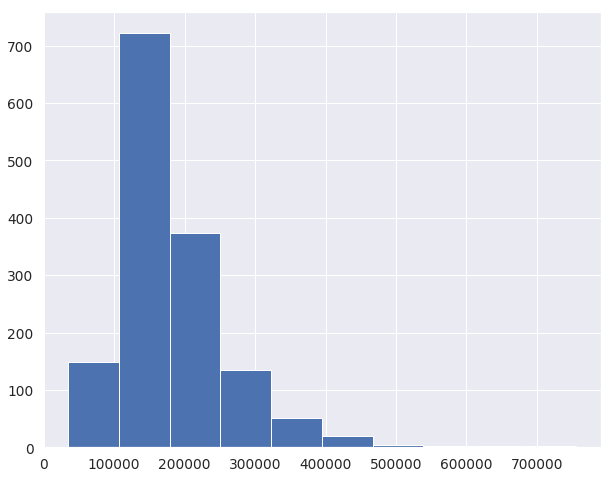

In [0]:
print(df_train.SalePrice.skew())
fig =plt.figure(figsize=(10,8))
plt.hist(df_train.SalePrice)
plt.show()

0.12131775882415026


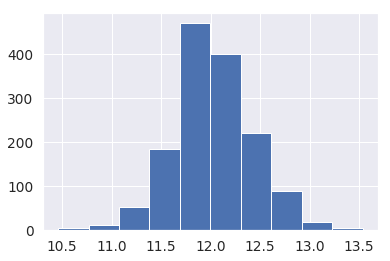

In [0]:
target =np.log(df_train.SalePrice)
print(target.skew())
plt.hist(target)
plt.show()

In [0]:
numerical =[f for f in df_train.columns if df_train.dtypes[f] != 'object']
categorical = [f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [0]:
numerical.remove('Id')#,'SalePrice'],inplace =True,axis =1)
numerical.remove('SalePrice')

In [0]:
#skewness = df_train[numerical].apply(lambda x: skew(x))
#skewness = skewness[abs(skewness) > 0.5]
#print("Below "+str(skewness.shape[0]) + " skewed numerical features to log transform")
#skewed_features = skewness.index
#df_train[numerical] = np.log1p(df_train[numerical])
#skewed_features

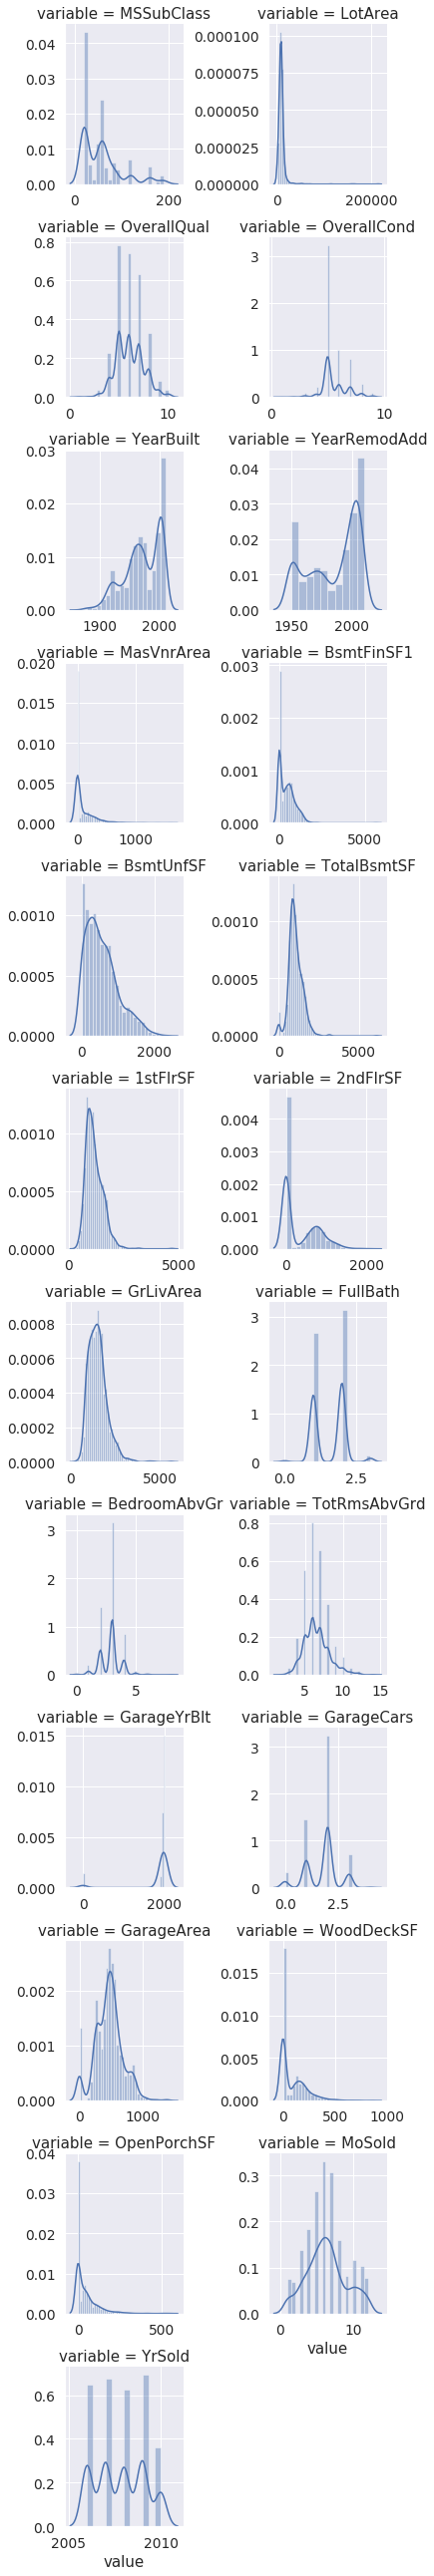

In [0]:
f = pd.melt(df_train, value_vars=numerical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

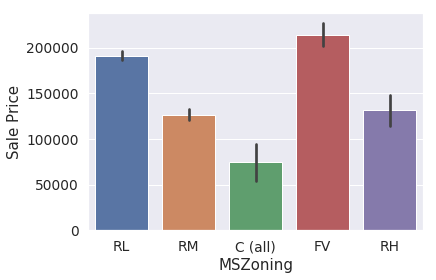

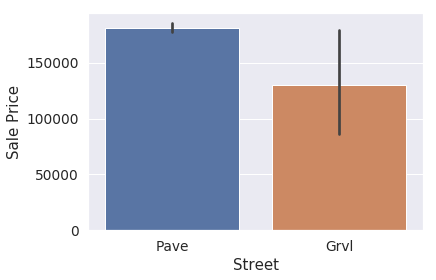

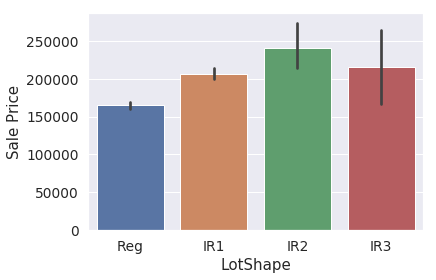

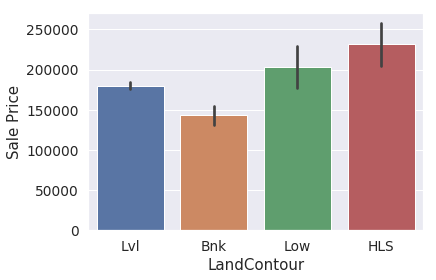

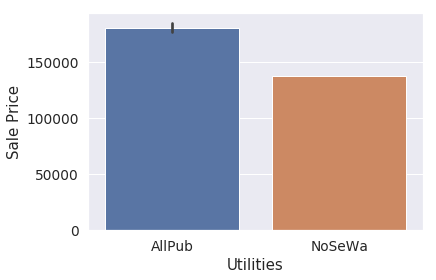

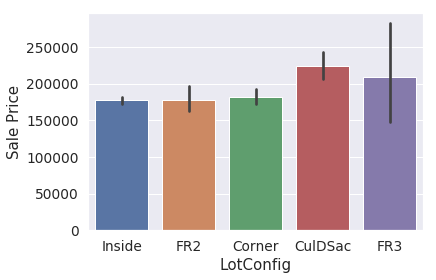

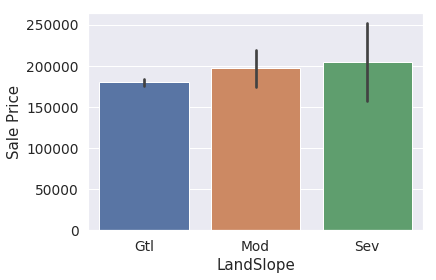

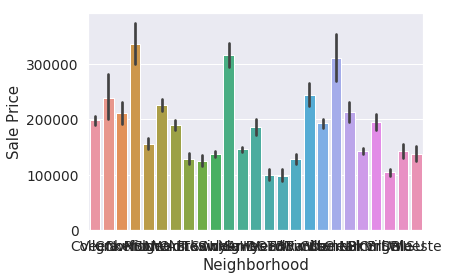

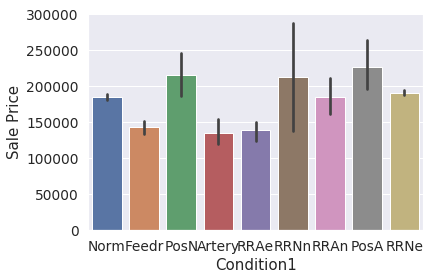

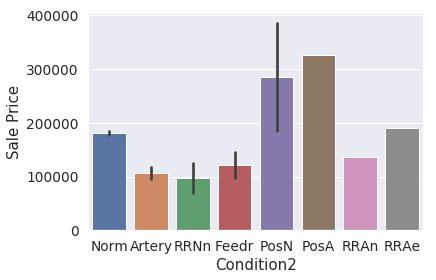

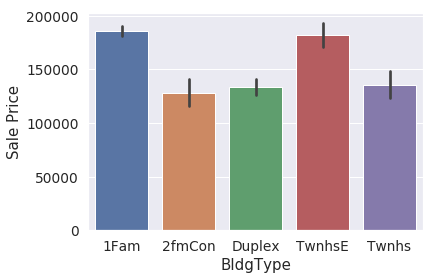

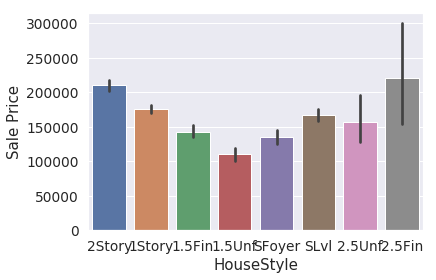

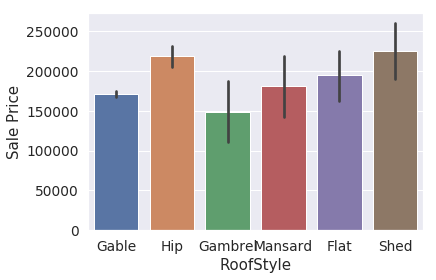

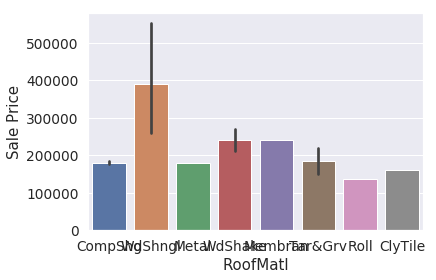

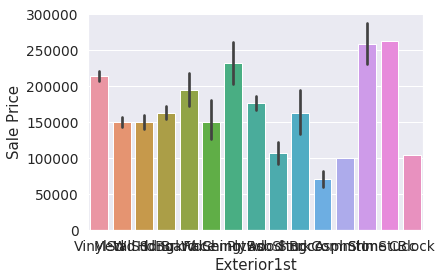

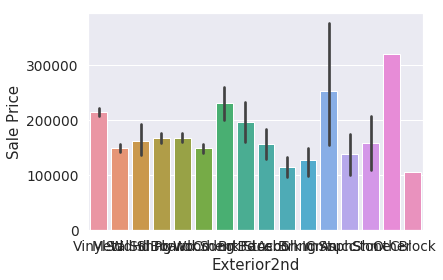

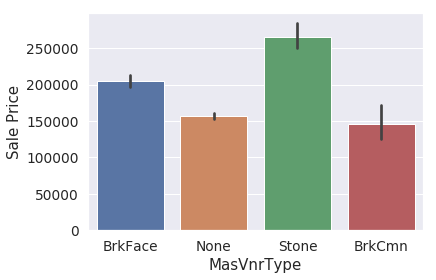

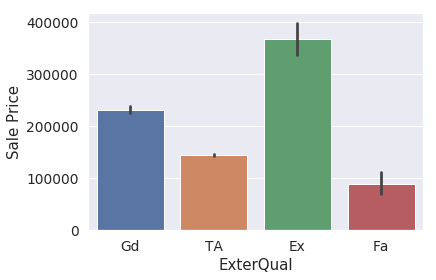

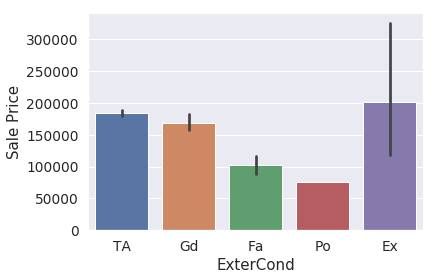

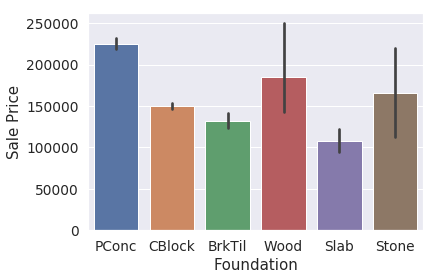

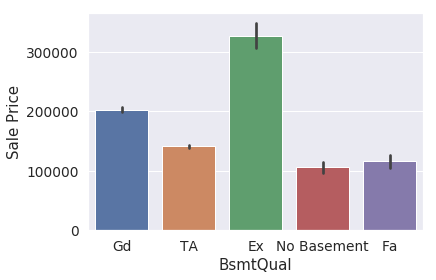

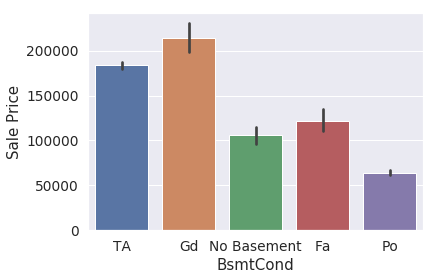

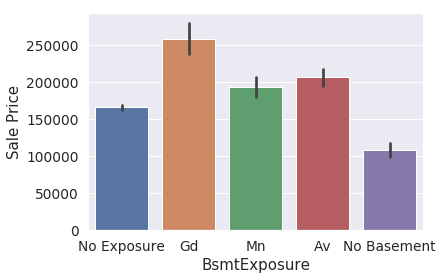

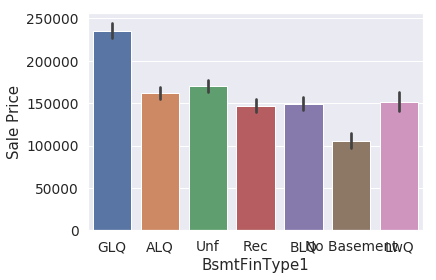

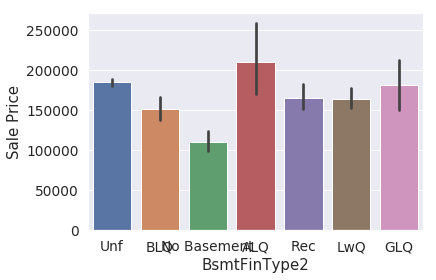

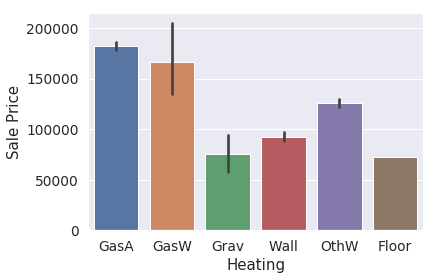

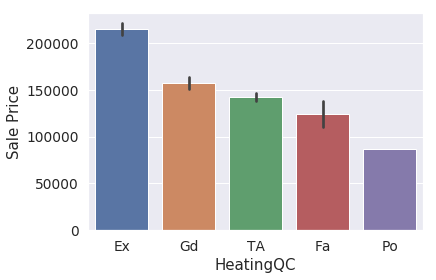

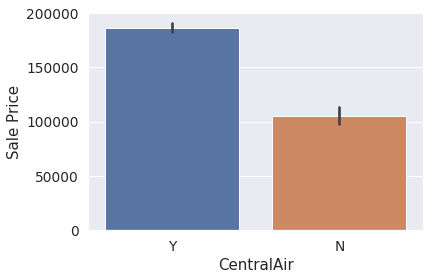

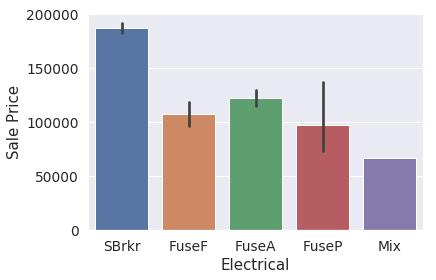

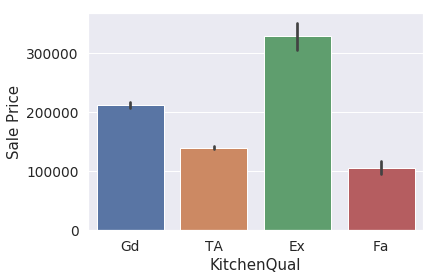

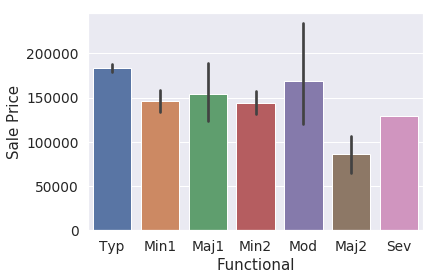

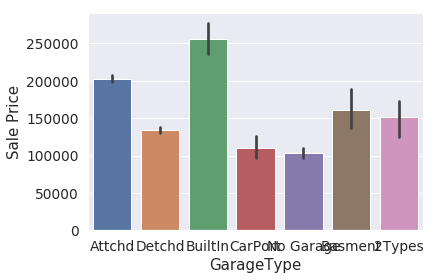

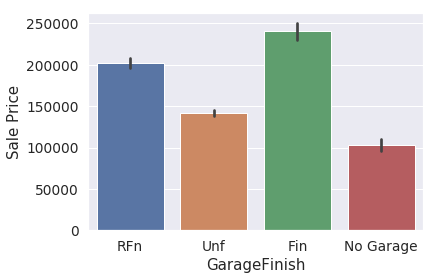

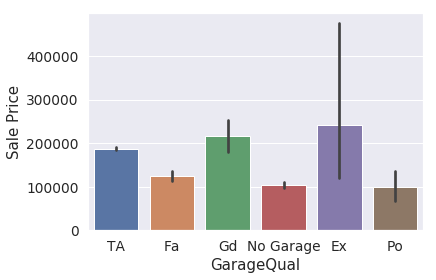

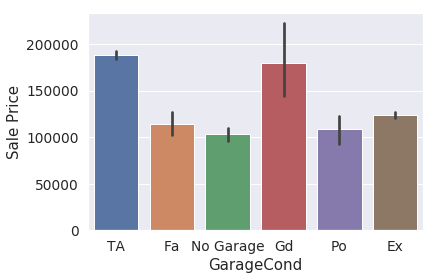

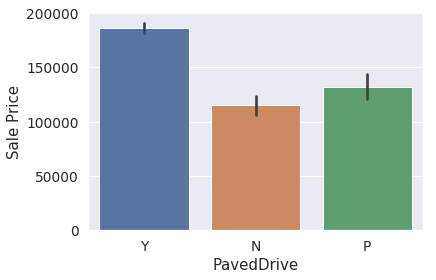

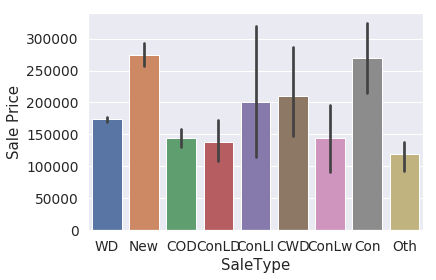

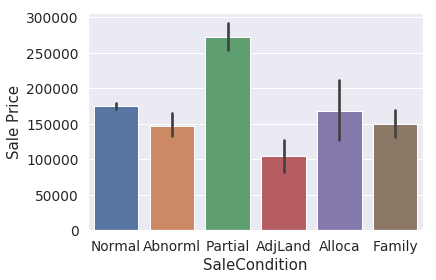

In [0]:
def plottingbar(col):
    sns.barplot(x=df_train[col], y=df_train.SalePrice)
    #plt.xlim(-200,1600) # This forces the same scale as before
    plt.ylabel('Sale Price')
    plt.xlabel(col)
    plt.show()
    
for col in categorical:
    plottingbar(col)

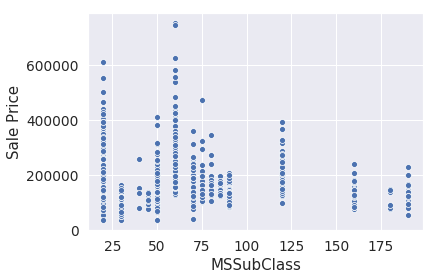

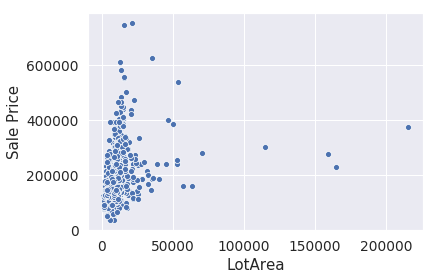

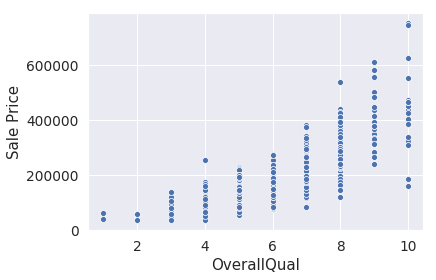

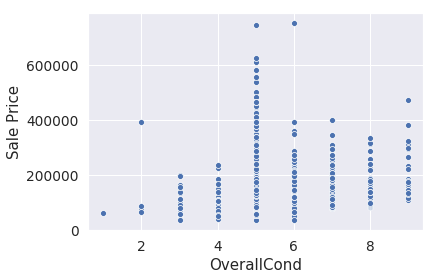

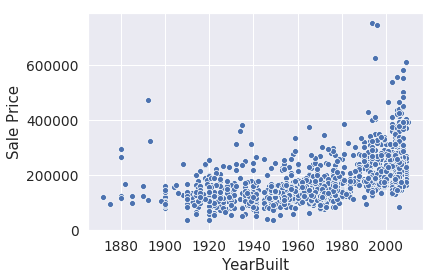

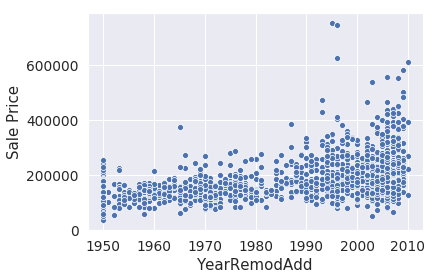

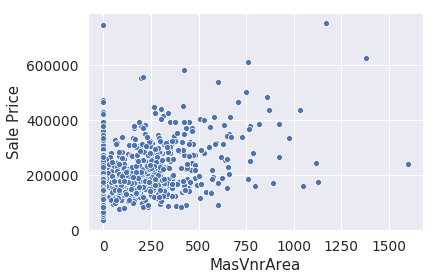

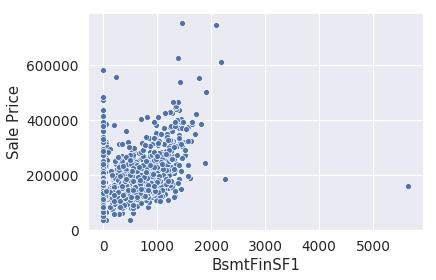

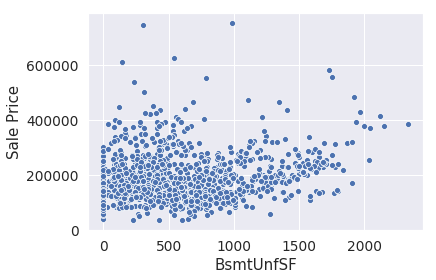

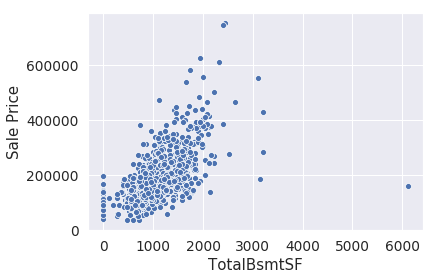

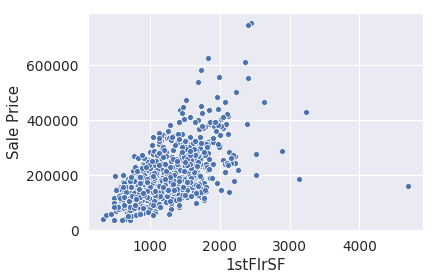

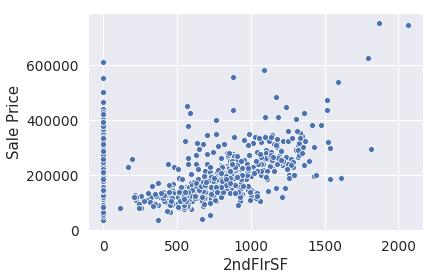

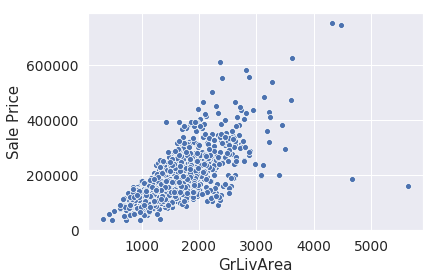

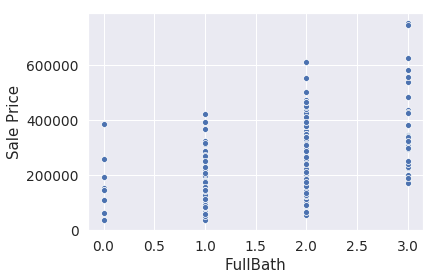

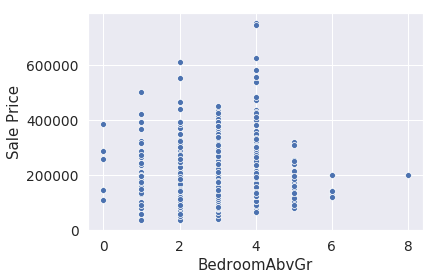

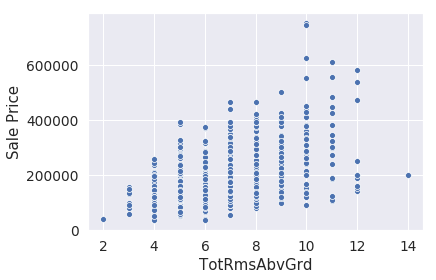

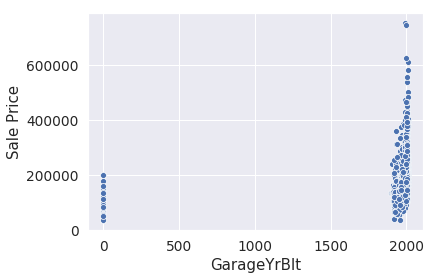

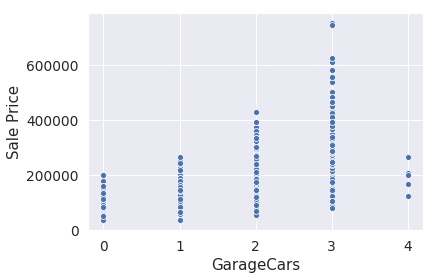

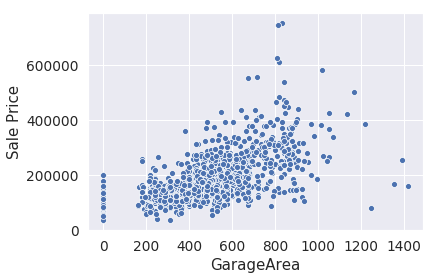

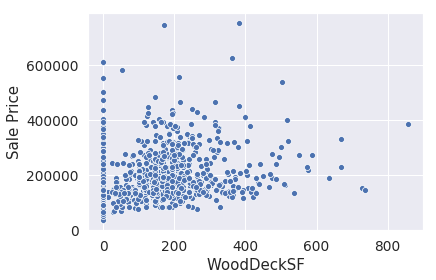

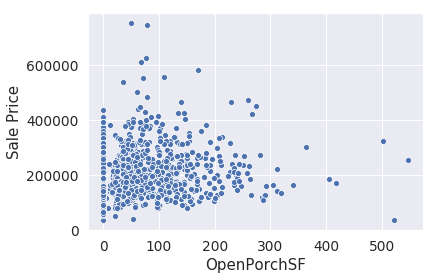

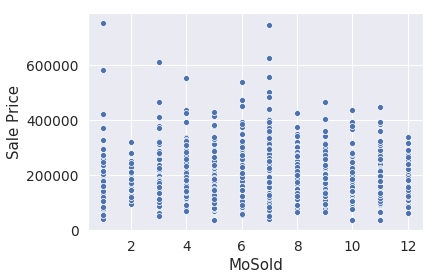

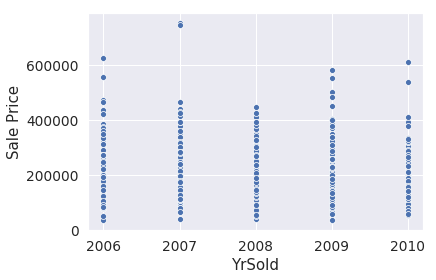

In [0]:
def plottingscatter(col):
    sns.scatterplot(x=df_train[col], y=df_train.SalePrice)
    #plt.xlim(-200,1600) # This forces the same scale as before
    plt.ylabel('Sale Price')
    plt.xlabel(col)
    plt.show()
    
for col in numerical:
    plottingscatter(col)

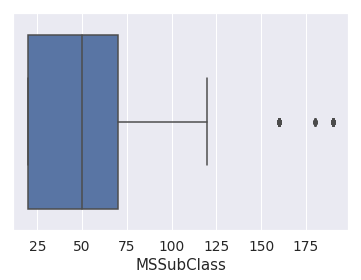

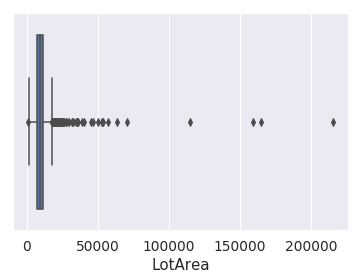

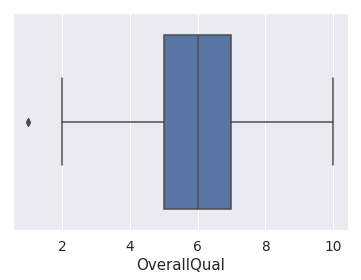

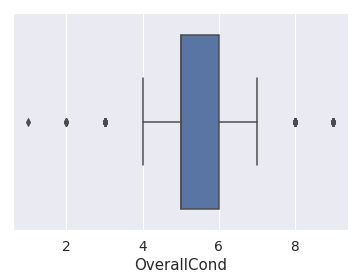

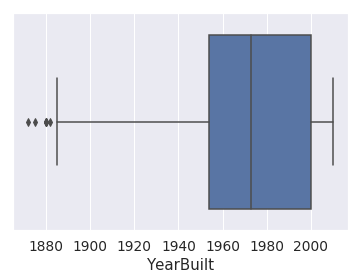

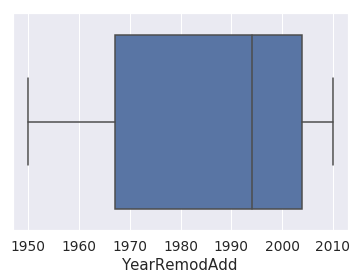

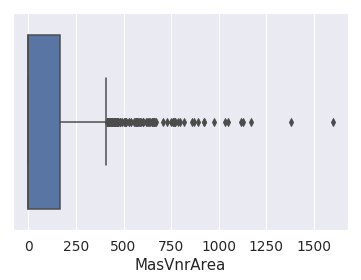

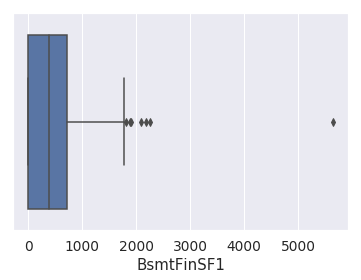

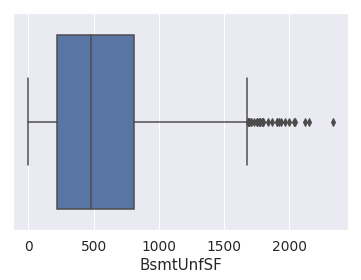

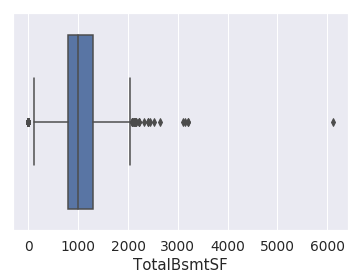

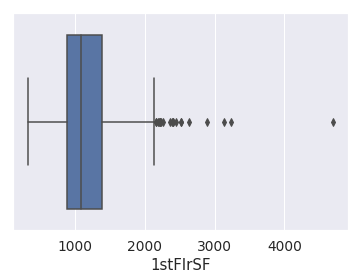

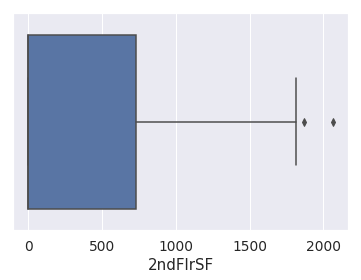

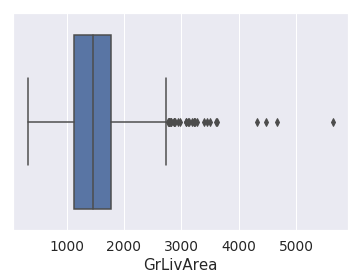

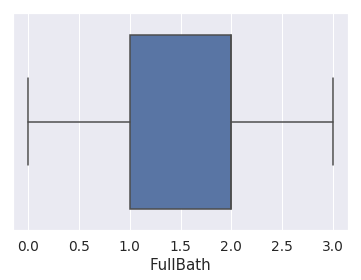

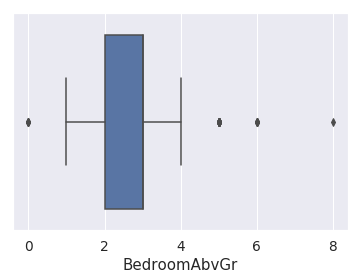

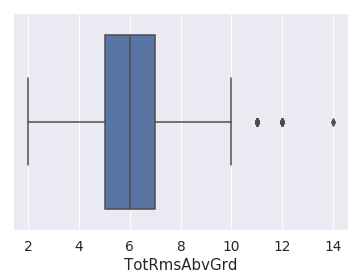

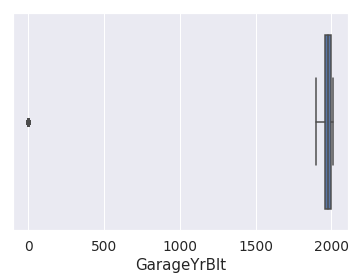

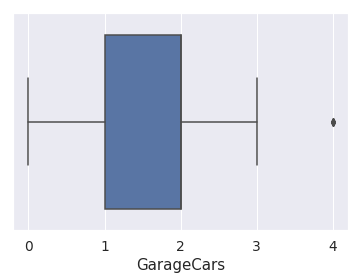

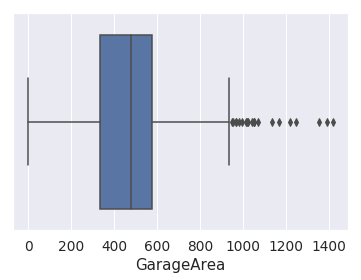

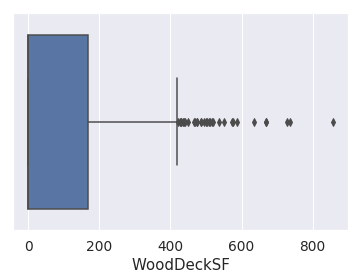

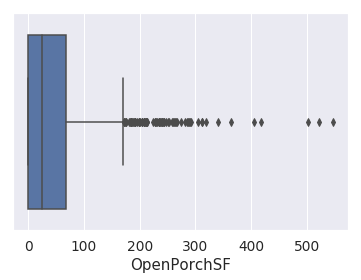

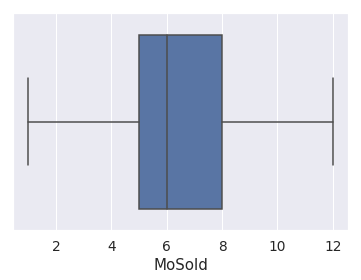

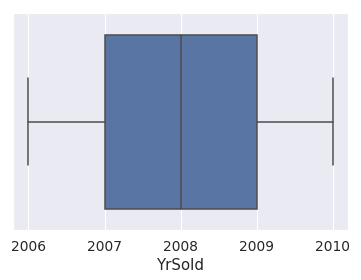

In [0]:
def plottingboxplot(col):
    sns.boxplot(x=df_train[col],data =df_train)
    #plt.xlim(-200,1600) # This forces the same scale as before
    #plt.ylabel('Sale Price')
    plt.xlabel(col)
    plt.show()
    
for col in numerical:
    plottingboxplot(col)



In [0]:
df_train.shape

(1459, 63)

In [0]:
df_train.LotArea.describe()

count      1459.000000
mean      10517.363948
std        9984.666267
min        1300.000000
25%        7549.000000
50%        9477.000000
75%       11603.000000
max      215245.000000
Name: LotArea, dtype: float64

In [0]:
def findingOutlier(col):
    q1,q3 = np.percentile(df_train[col],[25,75])
    IQR = q3-q1
    lowerbound = q1 - 1.5 * IQR
    upperbound = q3 + 1.5 * IQR
    print("Column:",col)
    print("lower bound:",lowerbound)
    print("upper bound:",upperbound)
    print("outliers: ",(df_train.loc[df_train[col]<lowerbound].shape[0]+
                        df_train.loc[df_train[col]>upperbound].shape[0])/df_train[col].shape[0]*100)
    print("no. of records having outliers:",df_train.loc[df_train[col]>upperbound].shape[0],'\n')

#outlierscol=['MSSubClass', 'LotArea','OverallCond','YearBuilt','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF', '1stFlrSF', 
#             '2ndFlrSF','GrLivArea','BedroomAbvGr','TotRmsAbvGrd','GarageCars', 'GarageArea', 'WoodDeckSF', 
#             'OpenPorchSF']
for col in numerical:
    findingOutlier(col)

Column: MSSubClass
lower bound: -55.0
upper bound: 145.0
outliers:  7.059629883481837
no. of records having outliers: 103 

Column: LotArea
lower bound: 1468.0
upper bound: 17684.0
outliers:  4.660726525017135
no. of records having outliers: 67 

Column: OverallQual
lower bound: 2.0
upper bound: 10.0
outliers:  0.1370801919122687
no. of records having outliers: 0 

Column: OverallCond
lower bound: 3.5
upper bound: 7.5
outliers:  8.567511994516792
no. of records having outliers: 94 

Column: YearBuilt
lower bound: 1885.0
upper bound: 2069.0
outliers:  0.47978067169294036
no. of records having outliers: 0 

Column: YearRemodAdd
lower bound: 1911.5
upper bound: 2059.5
outliers:  0.0
no. of records having outliers: 0 

Column: MasVnrArea
lower bound: -246.75
upper bound: 411.25
outliers:  6.716929403701164
no. of records having outliers: 98 

Column: BsmtFinSF1
lower bound: -1068.75
upper bound: 1781.25
outliers:  0.47978067169294036
no. of records having outliers: 7 

Column: BsmtUnfSF
lo

In [0]:
df_train.MSSubClass.describe()

count    1459.000000
mean       56.881426
std        42.310746
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [0]:
df_train.LotArea.describe()

count      1459.000000
mean      10517.363948
std        9984.666267
min        1300.000000
25%        7549.000000
50%        9477.000000
75%       11603.000000
max      215245.000000
Name: LotArea, dtype: float64

In [0]:
def HandlingOutlier(col):
    q1,q3 = np.percentile(df_train[col],[25,75])
    IQR = q3-q1
    lowerbound = q1 - 1.5 * IQR
    upperbound = q3 + 1.5 * IQR
    return lowerbound,upperbound

outlierscol =['LotArea','MasVnrArea','OpenPorchSF']
for col in outlierscol:
    lowerbound, upperbound=HandlingOutlier(col)
    print(lowerbound)
    print(upperbound)
    df_train =df_train.loc[~(df_train[col] >upperbound) |(df_train[col] <lowerbound)]

1468.0
17684.0
-244.875
408.125
-94.5
157.5


In [0]:
df_train.shape

(1225, 63)

In [0]:
df_train.MasVnrArea.describe()

count    1225.000000
mean       66.204082
std       105.532702
min         0.000000
25%         0.000000
50%         0.000000
75%       116.000000
max       408.000000
Name: MasVnrArea, dtype: float64

In [0]:
df_train.OpenPorchSF.describe()

count    1225.000000
mean       32.038367
std        40.973122
min         0.000000
25%         0.000000
50%        12.000000
75%        54.000000
max       156.000000
Name: OpenPorchSF, dtype: float64

##### correlation of all variables with target variable

In [0]:
corr =df_train.corr()
print(corr.SalePrice.sort_values(ascending = False))

SalePrice       1.000000
OverallQual     0.797977
GrLivArea       0.706428
GarageCars      0.630829
TotalBsmtSF     0.623927
GarageArea      0.614089
1stFlrSF        0.599268
FullBath        0.569550
YearBuilt       0.568951
YearRemodAdd    0.538947
TotRmsAbvGrd    0.516094
OpenPorchSF     0.411921
LotArea         0.398623
MasVnrArea      0.385159
BsmtFinSF1      0.372447
2ndFlrSF        0.297787
WoodDeckSF      0.286419
GarageYrBlt     0.278860
BsmtUnfSF       0.218796
BedroomAbvGr    0.190534
MoSold          0.079942
Id             -0.013469
YrSold         -0.030230
MSSubClass     -0.062488
OverallCond    -0.089440
Name: SalePrice, dtype: float64


In [0]:
##### checking any duplicate records

In [0]:
any(df_train.duplicated())

False

In [0]:
df_train.corr()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
Id,1.000000,0.029261,-0.028012,-0.015287,0.000689,-0.012194,-0.022291,-0.021500,0.001557,-0.014366,-0.016630,0.005140,0.014660,0.012749,0.012149,0.032154,0.021065,0.018978,0.013727,0.008251,-0.012029,-0.030282,0.021047,-0.001542,-0.013469
MSSubClass,0.029261,1.000000,-0.421702,0.064795,-0.052259,0.025136,0.040234,0.029497,-0.059188,-0.138917,-0.234037,-0.225424,0.319259,0.119297,0.142312,-0.032476,0.078942,-0.087686,-0.030891,-0.093247,-0.013334,-0.020564,-0.010089,-0.007496,-0.062488
LotArea,-0.028012,-0.421702,1.000000,0.201987,-0.039756,0.095751,0.074585,0.121904,0.167745,0.094143,0.297339,0.391030,0.108456,0.388624,0.207238,0.329812,0.377000,0.148906,0.268368,0.304317,0.136806,0.146096,0.011302,-0.025108,0.398623
OverallQual,-0.015287,0.064795,0.201987,1.000000,-0.092034,0.581834,0.545105,0.359046,0.188658,0.303732,0.505129,0.426221,0.294158,0.574437,0.541930,0.126528,0.412959,0.294971,0.584525,0.539207,0.207341,0.398139,0.079420,-0.028723,0.797977
OverallCond,0.000689,-0.052259,-0.039756,-0.092034,1.000000,-0.356494,0.080914,-0.125856,-0.026116,-0.153281,-0.173366,-0.162922,0.006685,-0.114594,-0.227019,-0.002735,-0.088391,0.018188,-0.175024,-0.142711,-0.010446,-0.099615,-0.003429,0.035379,-0.089440
YearBuilt,-0.012194,0.025136,0.095751,0.581834,-0.356494,1.000000,0.590109,0.324401,0.241936,0.158745,0.409836,0.290264,0.009277,0.209125,0.485025,-0.037850,0.110452,0.252345,0.535338,0.488929,0.223650,0.327636,0.024165,-0.018076,0.568951
YearRemodAdd,-0.022291,0.040234,0.074585,0.545105,0.080914,0.590109,1.000000,0.152942,0.107096,0.186731,0.297846,0.235182,0.137177,0.291314,0.432885,-0.017415,0.188930,0.146297,0.416651,0.373725,0.213011,0.311581,0.022219,0.033340,0.538947
MasVnrArea,-0.021500,0.029497,0.121904,0.359046,-0.125856,0.324401,0.152942,1.000000,0.204490,0.093130,0.286290,0.263626,0.115224,0.292474,0.227360,0.141318,0.264240,0.133123,0.344277,0.342014,0.124372,0.165509,0.032354,-0.010226,0.385159
BsmtFinSF1,0.001557,-0.059188,0.167745,0.188658,-0.026116,0.241936,0.107096,0.204490,1.000000,-0.529570,0.444016,0.361484,-0.190931,0.094457,0.039830,-0.090369,-0.021767,0.106076,0.185171,0.223905,0.190386,0.074675,0.029713,0.020836,0.372447
BsmtUnfSF,-0.014366,-0.138917,0.094143,0.303732,-0.153281,0.158745,0.186731,0.093130,-0.529570,1.000000,0.453148,0.330645,0.000306,0.248815,0.280715,0.167969,0.251924,0.047631,0.218758,0.194263,-0.033503,0.160443,0.034412,-0.049417,0.218796


In [0]:
print("Find most important features relative to target")
corr = df_train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice.sort_values(ascending = False)[:10])
print(corr.SalePrice.sort_values(ascending = False)[-10:])

Find most important features relative to target
SalePrice       1.000000
OverallQual     0.797977
GrLivArea       0.706428
GarageCars      0.630829
TotalBsmtSF     0.623927
GarageArea      0.614089
1stFlrSF        0.599268
FullBath        0.569550
YearBuilt       0.568951
YearRemodAdd    0.538947
Name: SalePrice, dtype: float64
2ndFlrSF        0.297787
WoodDeckSF      0.286419
GarageYrBlt     0.278860
BsmtUnfSF       0.218796
BedroomAbvGr    0.190534
MoSold          0.079942
Id             -0.013469
YrSold         -0.030230
MSSubClass     -0.062488
OverallCond    -0.089440
Name: SalePrice, dtype: float64


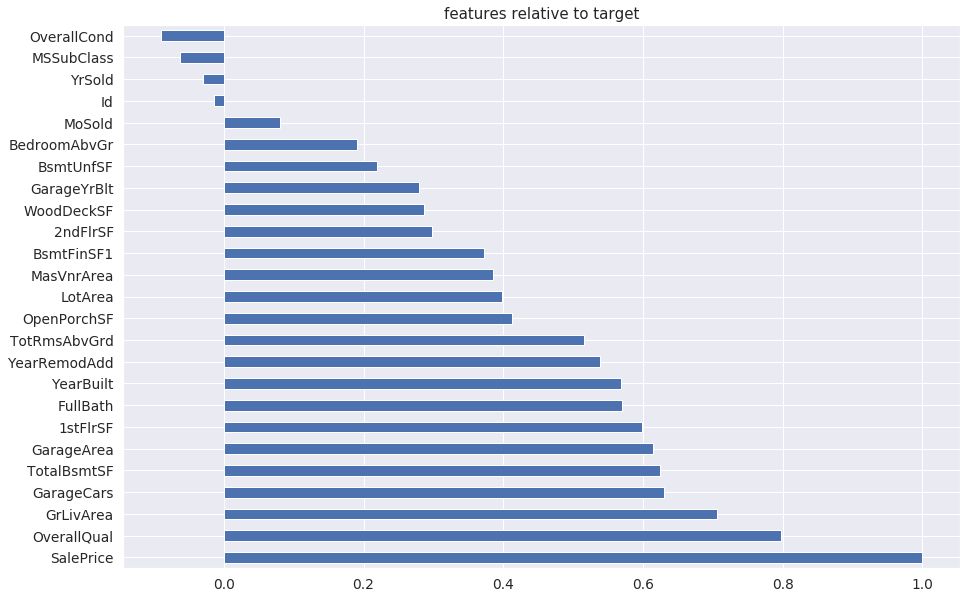

In [0]:

fig = plt.figure(figsize =(15,10))
corr.SalePrice.plot(kind = "barh")
plt.title("features relative to target")
plt.show()

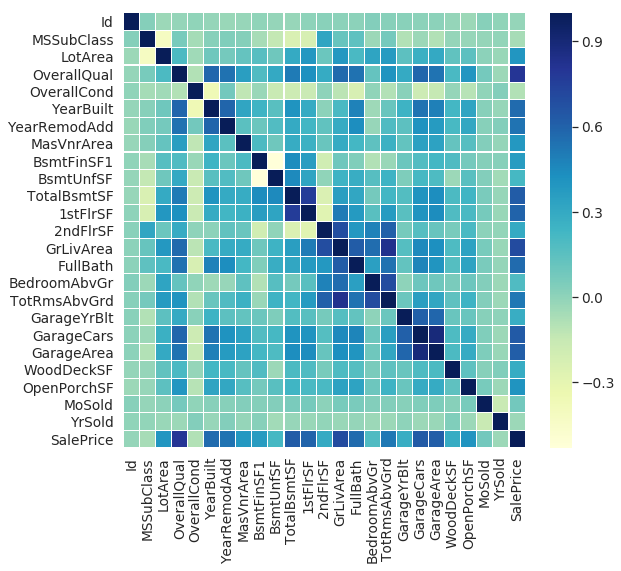

In [0]:
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(df_train.corr(), ax = ax, cmap ="YlGnBu", linewidths = 0.1)

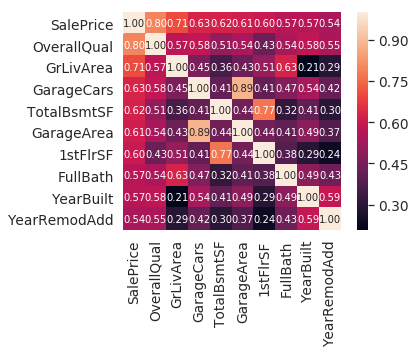

In [0]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = df_train.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [0]:
df_train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No Exposure,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,2,3,Gd,8,Typ,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,2,3,TA,6,Typ,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,2,3,Gd,6,Typ,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No Exposure,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,3,Gd,7,Typ,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,2,4,Gd,9,Typ,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,12,2008,WD,Normal,250000


##### Data preparation for model fitting

In [0]:
df_train.LotShape = df_train.LotShape.replace({'Reg':1,'IR1':2,'IR2':3,'IR3':4})
df_train.Utilities =df_train.Utilities.replace({'AllPub':1,'NoSewr':2,'NoSeWa':3,'ELO':4}) 
df_train.LandSlope=df_train.LandSlope.replace({'Gtl':1,'Mod':2,'Sev':3})
df_train.ExterQual = df_train.ExterQual.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
df_train.ExterCond =df_train.ExterCond.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
df_train.BsmtQual =df_train.BsmtQual.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'No Basement':6})
df_train.BsmtCond = df_train.BsmtCond.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'No Basement':6})
df_train.BsmtExposure = df_train.BsmtExposure.replace({'Gd':1,'Av':2,'Mn':3,'No Exposure':4,'No Basement':5})
df_train.BsmtFinType1=df_train.BsmtFinType1.replace({'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'No Basement':7})
df_train.BsmtFinType2=df_train.BsmtFinType2.replace({'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'No Basement':7})
df_train.CentralAir=df_train.CentralAir.replace({'Y':1,'N':0})
df_train.HeatingQC =df_train.HeatingQC.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
df_train.Electrical =df_train.Electrical.replace({'SBrkr':1,'FuseA':2,'FuseF':3,'FuseP':4,'Mix':5})
df_train.KitchenQual =df_train.KitchenQual.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
df_train.Functional =df_train.Functional.replace({'Typ':1,'Min1':2,'Min2':3,'Mod':4,'Maj1':5,'Maj2':6,'Sev':7,'Sal':8})
#df_train.FireplaceQu = df_train.FireplaceQu.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6})
df_train.GarageFinish =df_train.GarageFinish.replace({'Fin':1,'RFn':2,'Unf':3,'No Garage':4})
df_train.GarageQual =df_train.GarageQual.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'No Garage':6})
df_train.GarageCond  =df_train.GarageCond.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'No Garage':6})
df_train.PavedDrive  =df_train.PavedDrive.replace({'Y':1,'P':2,'N':3})
#df_train.PoolQC  =df_train.PoolQC.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6})


In [0]:
df_test.LotShape = df_test.LotShape.replace({'Reg':1,'IR1':2,'IR2':3,'IR3':4})
df_test.Utilities =df_test.Utilities.replace({'AllPub':1,'NoSewr':2,'NoSeWa':3,'ELO':4}) 
df_test.LandSlope=df_test.LandSlope.replace({'Gtl':1,'Mod':2,'Sev':3})
df_test.ExterQual = df_test.ExterQual.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
df_test.ExterCond =df_test.ExterCond.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
df_test.BsmtQual =df_test.BsmtQual.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'No Basement':6})
df_test.BsmtCond = df_test.BsmtCond.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'No Basement':6})
df_test.BsmtExposure = df_test.BsmtExposure.replace({'Gd':1,'Av':2,'Mn':3,'No Exposure':4,'No Basement':5})
df_test.BsmtFinType1=df_test.BsmtFinType1.replace({'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'No Basement':7})
df_test.BsmtFinType2=df_test.BsmtFinType2.replace({'GLQ':1,'ALQ':2,'BLQ':3,'Rec':4,'LwQ':5,'Unf':6,'No Basement':7})
df_test.CentralAir=df_test.CentralAir.replace({'Y':1,'N':0})
df_test.HeatingQC =df_test.HeatingQC.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
df_test.Electrical =df_test.Electrical.replace({'SBrkr':1,'FuseA':2,'FuseF':3,'FuseP':4,'Mix':5})
df_test.KitchenQual =df_test.KitchenQual.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5})
df_test.Functional =df_test.Functional.replace({'Typ':1,'Min1':2,'Min2':3,'Mod':4,'Maj1':5,'Maj2':6,'Sev':7,'Sal':8})
#df_test.FireplaceQu = df_test.FireplaceQu.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6})
df_test.GarageFinish =df_test.GarageFinish.replace({'Fin':1,'RFn':2,'Unf':3,'No Garage':4})
df_test.GarageQual =df_test.GarageQual.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'No Garage':6})
df_test.GarageCond  =df_test.GarageCond.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'No Garage':6})
df_test.PavedDrive  =df_test.PavedDrive.replace({'Y':1,'P':2,'N':3})
#df_test.PoolQC  =df_test.PoolQC.replace({'Ex':1,'Gd':2,'TA':3,'Fa':4,'Po':5,'NA':6})

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1225 entries, 0 to 1459
Data columns (total 63 columns):
Id               1225 non-null int64
MSSubClass       1225 non-null int64
MSZoning         1225 non-null object
LotArea          1225 non-null int64
Street           1225 non-null object
LotShape         1225 non-null int64
LandContour      1225 non-null object
Utilities        1225 non-null object
LotConfig        1225 non-null object
LandSlope        1225 non-null int64
Neighborhood     1225 non-null object
Condition1       1225 non-null object
Condition2       1225 non-null object
BldgType         1225 non-null object
HouseStyle       1225 non-null object
OverallQual      1225 non-null int64
OverallCond      1225 non-null int64
YearBuilt        1225 non-null int64
YearRemodAdd     1225 non-null int64
RoofStyle        1225 non-null object
RoofMatl         1225 non-null object
Exterior1st      1225 non-null object
Exterior2nd      1225 non-null object
MasVnrType       1225 non-nu

In [0]:
def changedtype(col):
    df_train[col]= df_train[col].astype(int)
    
cols =['Utilities','ExterQual','ExterCond','KitchenQual','Functional',
       'GarageFinish','GarageQual','GarageCond']
for col in cols:
    changedtype(col)
    



In [0]:
def changedtype(col):
    df_test[col]= df_test[col].astype(int)
    
cols =['Utilities','ExterQual','ExterCond','KitchenQual','Functional','GarageFinish','GarageQual','GarageCond']
for col in cols:
    changedtype(col)

In [0]:
numerical =[f for f in df_train.columns if df_train.dtypes[f] != 'object']
categorical =[f for f in df_train.columns if df_train.dtypes[f] == 'object']

In [0]:
numerical.remove('SalePrice')
numerical.remove('Id')

In [0]:
numericaltest =[f for f in df_test.columns if df_test.dtypes[f] != 'object']
categoricaltest =[f for f in df_test.columns if df_test.dtypes[f] == 'object']
#numerical.remove('SalePrice')
numericaltest.remove('Id')

In [0]:
xx=df_train.isnull().sum()
xx[xx>0]

Series([], dtype: int64)

In [0]:
xx=df_test.isnull().sum()
xx[xx>0]

Series([], dtype: int64)

In [0]:
def get_dummy(col,df_train):
    #print(df_train[col])
    colname = pd.get_dummies(df_train[col], drop_first = True).rename(columns=lambda x: col+'_' + str(x))
    #print("colname",colname)
    return colname



In [0]:

for col in categorical:
    colname =get_dummy(col,df_train)
    df_train = pd.concat([df_train, colname], axis=1)
    df_train.drop([col], inplace=True, axis=1)

In [0]:
def get_dummy(col,df_test):
    #print(df_train[col])
    colname = pd.get_dummies(df_test[col], drop_first = True).rename(columns=lambda x: col+'_' + str(x))
    #print("colname",colname)
    return colname

In [0]:
for col in categoricaltest:
    colname =get_dummy(col,df_test)
    df_test = pd.concat([df_test, colname], axis=1)
    df_test.drop([col], inplace=True, axis=1)

In [0]:
df_train.head()

,Id,MSSubClass,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,...,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,1,1,1,7,5,2003,2003,196.0,2,3,2,3,4,1,706,6,150,856,1,1,1,856,854,1710,2,3,2,8,1,2003.0,2,2,548,3,3,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,1,1,1,6,8,1976,1976,0.0,3,3,2,3,1,2,978,6,284,1262,1,1,1,1262,0,1262,2,3,3,6,1,1976.0,2,2,460,3,3,1,298,...,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,2,1,1,7,5,2001,2002,162.0,2,3,2,3,3,1,486,6,434,920,1,1,1,920,866,1786,2,3,2,6,1,2001.0,2,2,608,3,3,1,0,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,2,1,1,7,5,1915,1970,0.0,3,3,3,2,4,2,216,6,540,756,2,1,1,961,756,1717,1,3,2,7,1,1998.0,3,3,642,3,3,1,0,...,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,2,1,1,8,5,2000,2000,350.0,2,3,2,3,2,1,655,6,490,1145,1,1,1,1145,1053,2198,2,4,2,9,1,2000.0,2,3,836,3,3,1,192,...,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
df_test.head()

,Id,MSSubClass,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,...,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasW,Heating_Grav,Heating_Wall,Electrical_2,Electrical_3,Electrical_4,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,11622,1,1,1,5,6,1961,1961,0.0,3,3,3,3,4,4,468.0,5,270.0,882.0,3,1,896,0,896,1,2,3,5,1,1961.0,3,1.0,730.0,3,3,1,140,0,...,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1462,20,14267,2,1,1,6,6,1958,1958,108.0,3,3,3,3,4,2,923.0,6,406.0,1329.0,3,1,1329,0,1329,1,3,2,6,1,1958.0,3,1.0,312.0,3,3,1,393,36,...,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1463,60,13830,2,1,1,5,5,1997,1998,0.0,3,3,2,3,4,1,791.0,6,137.0,928.0,2,1,928,701,1629,2,3,3,6,1,1997.0,1,2.0,482.0,3,3,1,212,34,...,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1464,60,9978,2,1,1,6,6,1998,1998,20.0,3,3,3,3,4,1,602.0,6,324.0,926.0,1,1,926,678,1604,2,3,2,7,1,1998.0,1,2.0,470.0,3,3,1,360,36,...,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1465,120,5005,2,1,1,8,5,1992,1992,0.0,2,3,2,3,4,2,263.0,6,1017.0,1280.0,1,1,1280,0,1280,2,2,2,5,1,1992.0,2,2.0,506.0,3,3,1,0,82,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


##### Data preparation for modeling

In [0]:
df_train[df_train.SalePrice.isnull() ==False].shape[0]

1225

In [0]:
df_train.shape

(1225, 171)

In [0]:
df_test.shape

(1459, 167)

In [0]:
train_df = df_train.copy()
test_df = df_test.copy()


In [0]:
set( train_df.columns ) - set( test_df.columns )
#set( test_df.columns ) - set( train_df.columns )

{'Condition2_RRAn',
 'Condition2_RRNn',
 'Electrical',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_GasA',
 'Heating_OthW',
 'HouseStyle_2.5Fin',
 'SalePrice'}

In [0]:
set( test_df.columns ) - set( train_df.columns )

{'Condition2_PosA',
 'Condition2_PosN',
 'Electrical_2',
 'Electrical_3',
 'Electrical_4',
 'RoofStyle_Shed'}

In [0]:
#train_df = df_train.copy()
#test_df = df_test.copy()
# Get missing columns in the training test
missing_colstrain = set( test_df.columns ) - set( train_df.columns )
missing_colstest =set( train_df.columns ) - set( test_df.columns )
# Add a missing column in test set with default value equal to 0
#print("missingcols",missing_cols)
for c in missing_colstrain:
    train_df[c] = 0
for c in missing_colstest:
    test_df[c] = 0

In [0]:
##### Train and test dataset is splitted for fitting model

In [0]:
train_df.shape

(1225, 177)

In [0]:
test_df.shape

(1459, 177)

In [0]:
#train_preprocessed = df_train[:1232]
#test_preprocessed = df_train[1232:]
#train_preprocessed =df_train
#test_preprocessed=df_test
train_preprocessed =train_df
test_preprocessed=test_df

In [0]:
#df_train.drop(['Id'],inplace =True,axis=1)
#testwithID =test_preprocessed.copy()
train_preprocessed.drop(['Id'],inplace =True,axis=1)
test_preprocessed.drop(['Id'],inplace =True,axis=1)

In [0]:
train_preprocessed.shape

(1225, 176)

In [0]:
test_preprocessed.shape

(1459, 176)

In [0]:
xx =df_train.isnull().sum()
xx[xx>0]

Series([], dtype: int64)

In [0]:
temp= train_preprocessed.isnull().sum()
temp[temp>0]

Series([], dtype: int64)

In [0]:
test_preprocessed.shape

(1459, 176)

In [0]:
test_preprocessed =test_preprocessed.drop(['SalePrice'],axis =1)

In [0]:
temp= test_preprocessed.isnull().sum()
temp[temp>0]

Series([], dtype: int64)

In [0]:

q1,q2,q3 = np.percentile(train_preprocessed['SalePrice'],[25,75,95])

In [0]:
q3

295194.3999999999

In [0]:
X =train_preprocessed.drop(['SalePrice'],axis =1)
#y = np.log1p(train_preprocessed['SalePrice'])
y = train_preprocessed['SalePrice']

In [0]:
# Splitting the train data into train and test for finding the accuracy
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [0]:
X_train.shape

(857, 175)

In [0]:
X_test.shape

(368, 175)

In [0]:
y_train.shape

(857,)

In [0]:
y_test.shape

(368,)

In [0]:
scaler = MinMaxScaler()
X_train[numerical]= scaler.fit_transform(X_train[numerical])
#train =scaler.fit_transform(trainX)
X_test[numerical]= scaler.transform(X_test[numerical])

In [0]:
MLA = [
    
    xgb.XGBRegressor(objective="reg:linear", random_state=42),
    LinearRegression()
    
    ]

In [0]:
def Modelcompare():
    MLA_columns = []
    MLA_compare = pd.DataFrame(columns = MLA_columns)


    row_index = 0
    for alg in MLA:


        ypred = alg.fit(df_train_pca, y_train).predict(df_test_pca)

        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index,'MLA Name'] = MLA_name
        MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(df_train_pca, y_train), 4)
        MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(df_test_pca, y_test), 4)

        MLA_compare.loc[row_index, 'MSE-Testdata'] =round( mean_squared_error(y_test, ypred))
        MLA_compare.loc[row_index, 'RMSE-Testdata'] = round(np.sqrt(mean_squared_error(y_test, ypred)))
        MLA_compare.loc[row_index, 'ErrorRatio'] =round( np.mean(np.abs((y_test - ypred) / y_test)) * 100)
        MLA_compare.loc[row_index, 'R2score'] = r2_score(y_test,ypred)

        fig = plt.figure()
        plt.scatter(y_test,ypred)
        fig.suptitle(MLA_name, fontsize=20)              # Plot heading 
        plt.xlabel('y_test', fontsize=18)                          # X-label
        plt.ylabel('y_pred', fontsize=16)
        row_index+=1

    MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
    return MLA_compare

In [0]:
pca = PCA(svd_solver='randomized', random_state=42)


In [0]:
pca.fit(X_train)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

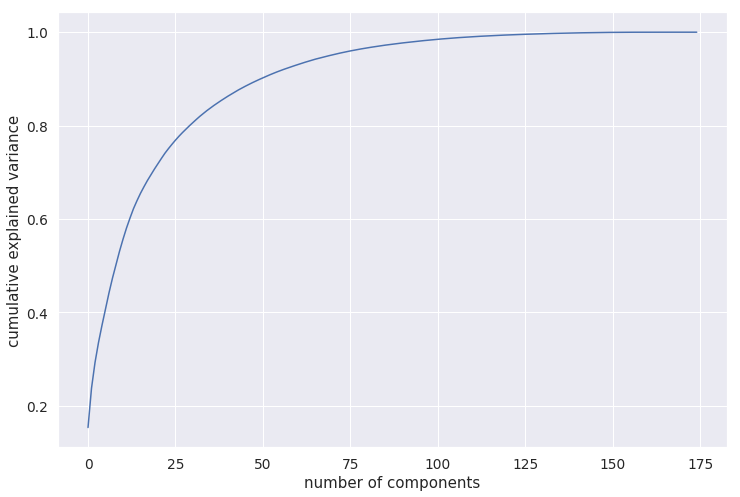

In [0]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [0]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets

pca_final = IncrementalPCA(n_components=60)

In [0]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(857, 60)

In [0]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

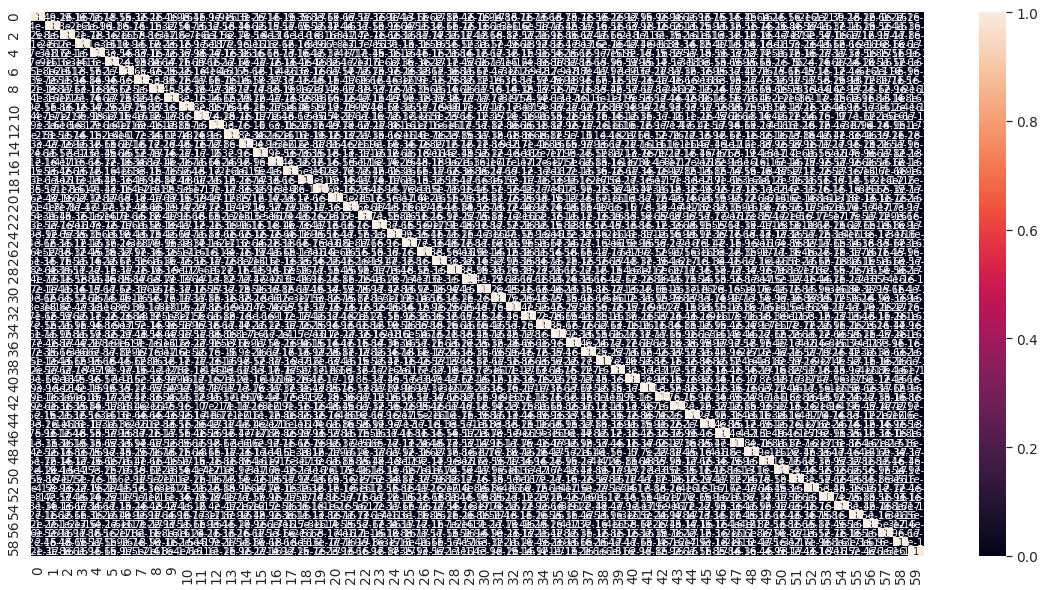

In [0]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [0]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 1.3214494159168146e-15 , min corr:  -1.2956470357766056e-15


In [0]:
#Applying selected components to the test data - 50 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(368, 60)

[14:05:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MSE-Testdata,RMSE-Testdata,ErrorRatio,R2score
1,LinearRegression,0.8669,0.8446,605653284.0,24610.0,13.0,0.844635
0,XGBRegressor,0.9626,0.7500,974629985.0,31219.0,14.0,0.749984


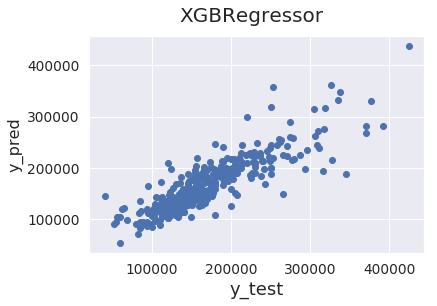

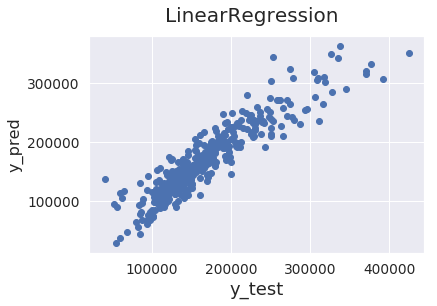

In [0]:
MLA_compare =Modelcompare()
MLA_compare

In [0]:
##### linear regression gives better accuracy and R2square score compare to XGBregressor for test dataset.
##### XGB regressor gives better accuracy than linear regression for train dataset, but for test dataset accuary is less.
##### Applying Regulaization in linear regression and compare the results further

In [0]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, df_train_pca, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, df_test_pca, y_test, scoring = scorer, cv = 10))
    return(rmse)

Best alpha : 3.0
Try again for more precision with alphas centered around 3.0
Best alpha : 4.199999999999999
Ridge RMSE on Training set : 26726.24760851828
Ridge RMSE on Test set : 25618.757211742068


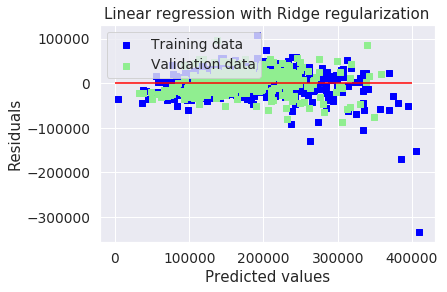

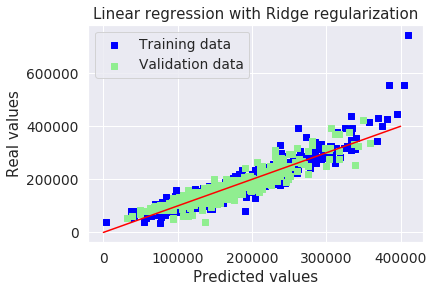

In [0]:
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(df_train_pca, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(df_train_pca, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(df_train_pca)
y_test_rdg = ridge.predict(df_test_pca)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 400000, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 400000], [0, 400000], c = "red")
plt.show()

# Plot important coefficients
#coefs = pd.Series(ridge.coef_, index = df_train_pca)
#print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
#      str(sum(coefs == 0)) + " features")
#imp_coefs = pd.concat([coefs.sort_values().head(10),
#                     coefs.sort_values().tail(10)])
#imp_coefs.plot(kind = "barh")
#plt.title("Coefficients in the Ridge Model")
#plt.show()

Best alpha : 1.0
Try again for more precision with alphas centered around 1.0
Best alpha : 1.4
Lasso RMSE on Training set : 26979.568902838695
Lasso RMSE on Test set : 26413.752325138117


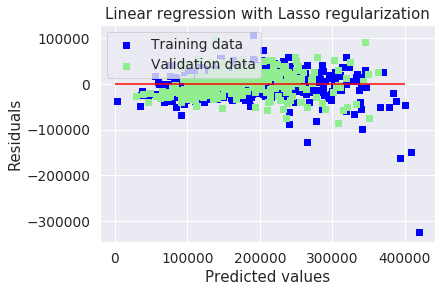

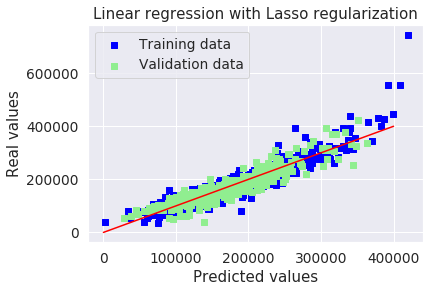

In [0]:
# 3* Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 
                          0.3, 0.6, 1], 
                max_iter = 50000, cv = 10)
lasso.fit(df_train_pca, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, 
                          alpha * .85, alpha * .9, alpha * .95, alpha, alpha * 1.05, 
                          alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, 
                          alpha * 1.4], 
                max_iter = 50000, cv = 10)
lasso.fit(df_train_pca, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(df_train_pca)
y_test_las = lasso.predict(df_test_pca)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 400000, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 400000], [0, 400000], c = "red")
plt.show()

# Plot important coefficients
#coefs = pd.Series(lasso.coef_, index = X_train.columns)
#print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
#      str(sum(coefs == 0)) + " features")
#imp_coefs = pd.concat([coefs.sort_values().head(10),
#                     coefs.sort_values().tail(10)])
#imp_coefs.plot(kind = "barh")
#plt.title("Coefficients in the Lasso Model")
#plt.show()

##### not finding much difference in RMSE value with regularization and without regularization.


##### Predict the saleprice for actual test dataset

In [0]:
lm =LinearRegression()
lm.fit(df_train_pca,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
test_values = test_preprocessed.values
test_std = MinMaxScaler().fit_transform(test_values)
test_228d = pca_final.transform(test_std)

test_pred = lm.predict(test_228d)

In [0]:
test_preprocessed.shape

(1459, 175)

In [0]:
test_pred

array([ 94789.16191468,  97591.74008276, 114340.56946789, ...,
       100942.02272516, 132477.88786408, 152188.35801525])

In [0]:
L1 = list(test['Id'])
L2 = list(test_pred)
d = dict(zip(L1,L2))
prediction=pd.DataFrame.from_dict(d, orient='index',columns=[ 'SalePrice'])
prediction.index.name = 'Id'
prediction.reset_index()

,Id,SalePrice
0,1461,94789.161915
1,1462,97591.740083
2,1463,114340.569468
3,1464,110454.632726
4,1465,122482.796206
5,1466,113242.781299
6,1467,123283.733599
7,1468,95639.731072
8,1469,131317.663347
9,1470,79291.038184


##### writing the results into submission csv file

In [0]:
prediction.to_csv("submission.csv")